In [3]:
import sys
import time
import importlib

import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
from loguru import logger
import matplotlib.pyplot as plt

sys.path.append("../src/pyproteomics/")
import helper
import filtering
import imputation

date = time.strftime("%Y%m%d")
logger.remove()
logger.add(sys.stdout, format="<green>{time:HH:mm:ss.SS}</green> | <level>{level}</level> | {message}")

5

In [2]:
path_to_DIANN = "../tests/data/20241211_DIANN.pg_matrix.tsv"
path_to_metadata = "../tests/data/20241217_DIANN_metadata.csv"

In [209]:
adata = helper.DIANN_to_adata(DIANN_path=path_to_DIANN, metadata_path=path_to_metadata, metadata_sep=";",sample_id_column="LCMS_run_id")

13:52:17.69 | INFO | DIANN_to_adata function started (v2.0)
13:52:17.69 | INFO | Step 1: Loading DIANN output file

13:52:17.84 | INFO | Step 2: Loading metadata file
13:52:17.84 | INFO | Step 3: Loading protein metadata
13:52:17.84 | INFO | For a total of 7030 proteins 

13:52:17.84 | INFO | Step 4: Creating anndata object:
AnnData object with n_obs × n_vars = 248 × 7030
    obs: 'File.Name', 'Precursors.Identified', 'Proteins.Identified', 'Total.Quantity', 'MS1.Signal', 'MS2.Signal', 'FWHM.Scans', 'FWHM.RT', 'Median.Mass.Acc.MS1', 'Median.Mass.Acc.MS1.Corrected', 'Median.Mass.Acc.MS2', 'Median.Mass.Acc.MS2.Corrected', 'MS2.Mass.Instability', 'Normalisation.Instability', 'Median.RT.Prediction.Acc', 'Average.Peptide.Length', 'Average.Peptide.Charge', 'Average.Missed.Tryptic.Cleavages', 'filename', 'Machine', 'Date', 'User_id', 'LC', 'Acquisition', 'Exp_id', 'Plate_384wp_id', '384wp_well_real', 'Vial', 'Vol_injected', '96wp_well', '96wp_id', 'Biopsy_type', 'RCN', 'RCN_long', 'replicate'

In [210]:
adata = adata[~(adata.obs['Plate_384wp_id'] == "HELA")]
adata

View of AnnData object with n_obs × n_vars = 219 × 7030
    obs: 'File.Name', 'Precursors.Identified', 'Proteins.Identified', 'Total.Quantity', 'MS1.Signal', 'MS2.Signal', 'FWHM.Scans', 'FWHM.RT', 'Median.Mass.Acc.MS1', 'Median.Mass.Acc.MS1.Corrected', 'Median.Mass.Acc.MS2', 'Median.Mass.Acc.MS2.Corrected', 'MS2.Mass.Instability', 'Normalisation.Instability', 'Median.RT.Prediction.Acc', 'Average.Peptide.Length', 'Average.Peptide.Charge', 'Average.Missed.Tryptic.Cleavages', 'filename', 'Machine', 'Date', 'User_id', 'LC', 'Acquisition', 'Exp_id', 'Plate_384wp_id', '384wp_well_real', 'Vial', 'Vol_injected', '96wp_well', '96wp_id', 'Biopsy_type', 'RCN', 'RCN_long', 'replicate', 'class_name'
    var: 'Protein.Names', 'Genes', 'First.Protein.Description'

In [211]:
adata = filtering.filter_out_contaminants(adata)

13:52:20.06 | INFO | Filtering out contaminants
The output object has 6766 proteins in it




In [212]:
adata = filtering.filter_invalid_proteins(adata, threshold=0.7, grouping="RCN")

13:52:21.25 | INFO | Filtering proteins, they need to have 70.0% valid values to be kept
13:52:21.26 | INFO | Filtering proteins by groups, RCN: ['RCN1', 'COL', 'RCN5', 'RCN3', 'InvasiveFront']
13:52:21.26 | DEBUG | Processing group: RCN1
13:52:21.26 | DEBUG | Group RCN1 has 169 samples and 6766 proteins
13:52:21.30 | DEBUG | Processing group: COL
13:52:21.32 | DEBUG | Group COL has 5 samples and 6766 proteins
13:52:21.33 | DEBUG | Processing group: RCN5
13:52:21.33 | DEBUG | Group RCN5 has 19 samples and 6766 proteins
13:52:21.33 | DEBUG | Processing group: RCN3
13:52:21.33 | DEBUG | Group RCN3 has 22 samples and 6766 proteins
13:52:21.34 | DEBUG | Processing group: InvasiveFront
13:52:21.34 | DEBUG | Group InvasiveFront has 4 samples and 6766 proteins
13:52:21.34 | INFO | Any protein that has a minimum of 70.0 valid values in ANY group, will be kept
13:52:21.34 | INFO | 4606 proteins were kept
13:52:21.34 | INFO | 2160 proteins were removed


/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebooks/../src/pyproteomics/filtering.py:196: RuntimeWarning: Mean of empty slice
  df_proteins[f"{group}_mean"]            = np.nanmean(adata_group.X, axis=0).round(3)
/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebooks/../src/pyproteomics/filtering.py:196: RuntimeWarning: Mean of empty slice
  df_proteins[f"{group}_mean"]            = np.nanmean(adata_group.X, axis=0).round(3)
/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebooks/../src/pyproteomics/filtering.py:196: RuntimeWarning: Mean of empty slice
  df_proteins[f"{group}_mean"]            = np.nanmean(adata_group.X, axis=0).round(3)
/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebooks/../src/pyproteomics/filtering.py:196: RuntimeWarning: Mean of empty slice
  df_proteins[f"{group}_mean"]            = np.nanmean(adata_group.X, axis=0).round(3)
/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebo

In [14]:
filtered_adata = adata.copy()

In [15]:
filtered_adata.write("filtered_adata.h5ad")

In [215]:
df = adata.to_df()

In [ ]:
df

In [136]:
mean_shift=-1.8
std_dev_shift=0.3

def impute_single_debugging(array, mean_shift, std_dev_shift):
    mean   = np.nanmean(array)
    stddev = np.nanstd(array)
    nans   = np.isnan(array)
    num_nans = np.sum(nans)

    #qc
    logger.debug(f"mean: {mean}")
    logger.debug(f"stddev: {stddev}")
    logger.debug(f"Coefficient of variation: {stddev/mean}")
    logger.debug(f"Min  : {np.nanmin(array)}")
    logger.debug(f"Max  : {np.nanmax(array)}")


    fig, axes = plt.subplots(3,2, figsize=(10,10))

    axes[0, 0].set_title('Non log transformed')
    axes[0, 1].set_title('Log2 transformed')

    n, bin_edges, patches = plt.hist(array, bins=30) #nonlog
    _, bin_edges_log2, _ = plt.hist(np.log2(array), bins=30) #nonlog

    #plot non log data
    axes[0,0].hist(array, bins=bin_edges)
    axes[0,0].axvline(mean, color='r')
    axes[0,0].axvline(mean + stddev, color='g')
    axes[0,0].axvline(mean - stddev, color='g')
    axes[0,0].grid(False)

    shifted_random_values = np.random.normal(
        loc=(mean + (mean_shift * stddev)), 
        scale=(stddev * std_dev_shift), 
        size=num_nans)
    
    axes[1,0].hist(shifted_random_values, bins=bin_edges, color='r')
    axes[1,0].sharex(axes[0,0])

    axes[2,0].hist(array, bins=bin_edges)
    axes[2,0].hist(shifted_random_values, bins=bin_edges, color='r', alpha=0.5)
    axes[2,0].axvline(mean, color='r')
    axes[2,0].axvline(mean + stddev, color='g')
    axes[2,0].axvline(mean - stddev, color='g')
    axes[2,0].grid(False)
    axes[2,0].sharex(axes[0,0])

    #plot log2 transformed array
    array_log2 = np.log2(array)
    mean_log2 = np.nanmean(array_log2)
    stddev_log2 = np.nanstd(array_log2)

    axes[0,1].hist(array_log2, bins=bin_edges_log2)
    axes[0,1].axvline(mean_log2, color='r')
    axes[0,1].axvline(mean_log2 + stddev_log2, color='g')
    axes[0,1].axvline(mean_log2 - stddev_log2, color='g')
    axes[0,1].grid(False)

    shifted_random_values_log2 = np.random.normal(
        loc=(mean_log2 + (mean_shift * stddev_log2)), 
        scale=(stddev_log2 * std_dev_shift), 
        size=num_nans)
    
    axes[1,1].hist(shifted_random_values_log2, bins=bin_edges_log2, color='r')

    # axes[2,1].hist(array_log2, bins=bin_edges_log2)
    axes[2,1].axvline(mean_log2, color='r')
    axes[2,1].axvline(mean_log2 + stddev_log2, color='g')
    axes[2,1].axvline(mean_log2 - stddev_log2, color='g')
    axes[2,1].hist(shifted_random_values_log2, bins=bin_edges_log2, color='r', alpha=0.5)
    axes[2,1].grid(False)

    #add text how many NaNs and non nans
    fig.text(0.5, 1.005, f"NaNs: {num_nans}", horizontalalignment='right', verticalalignment='top')
    fig.text(0.7, 1.005, f"Valid values: {len(array) - num_nans}", horizontalalignment='right', verticalalignment='top')

    plt.show()

    return mean,stddev,nans,num_nans

11:51:15.27 | DEBUG | mean: 33975.33357142858
11:51:15.27 | DEBUG | stddev: 50458.11020003279
11:51:15.27 | DEBUG | Coefficient of variation: 1.4851395084599062
11:51:15.27 | DEBUG | Min  : 1645.99
11:51:15.27 | DEBUG | Max  : 320022.0


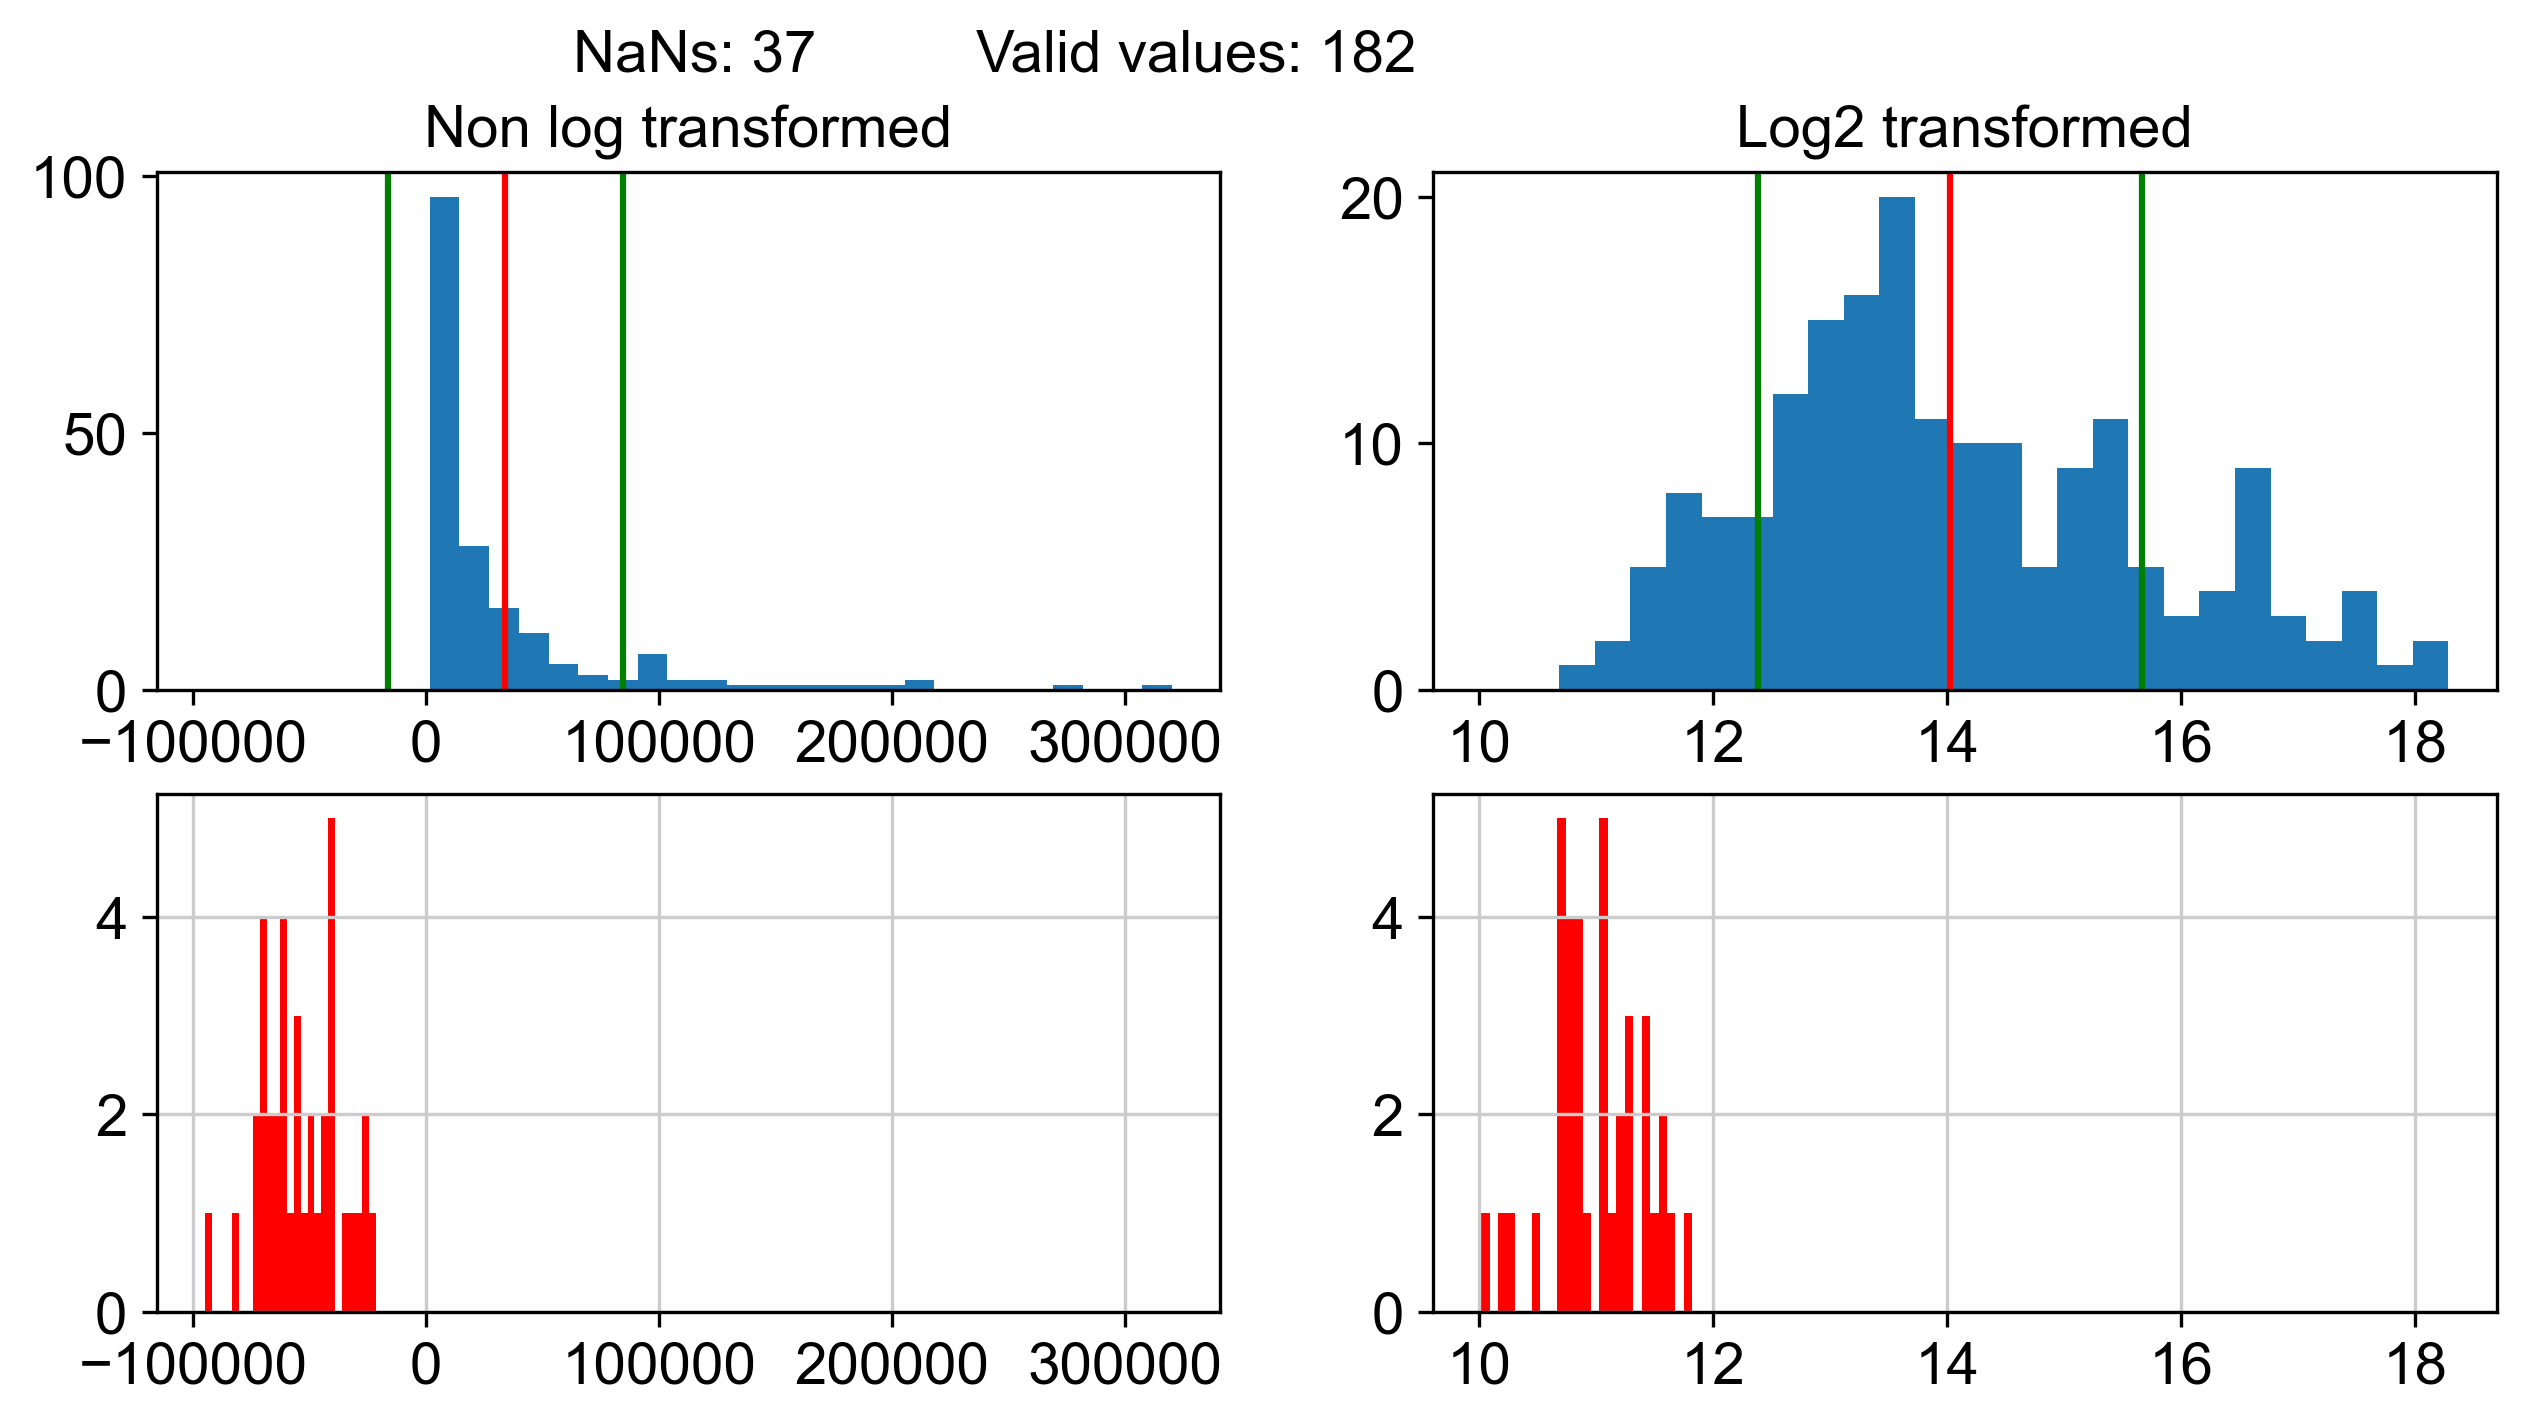

In [106]:
mean,stddev,nans,num_nans = impute_single_debugging(df["A0A075B6K5"].values, mean_shift, std_dev_shift)

11:51:15.27 | DEBUG | mean: 33975.33357142858
11:51:15.27 | DEBUG | stddev: 50458.11020003279
11:51:15.27 | DEBUG | Coefficient of variation: 1.4851395084599062
11:51:15.27 | DEBUG | Min  : 1645.99
11:51:15.27 | DEBUG | Max  : 320022.0


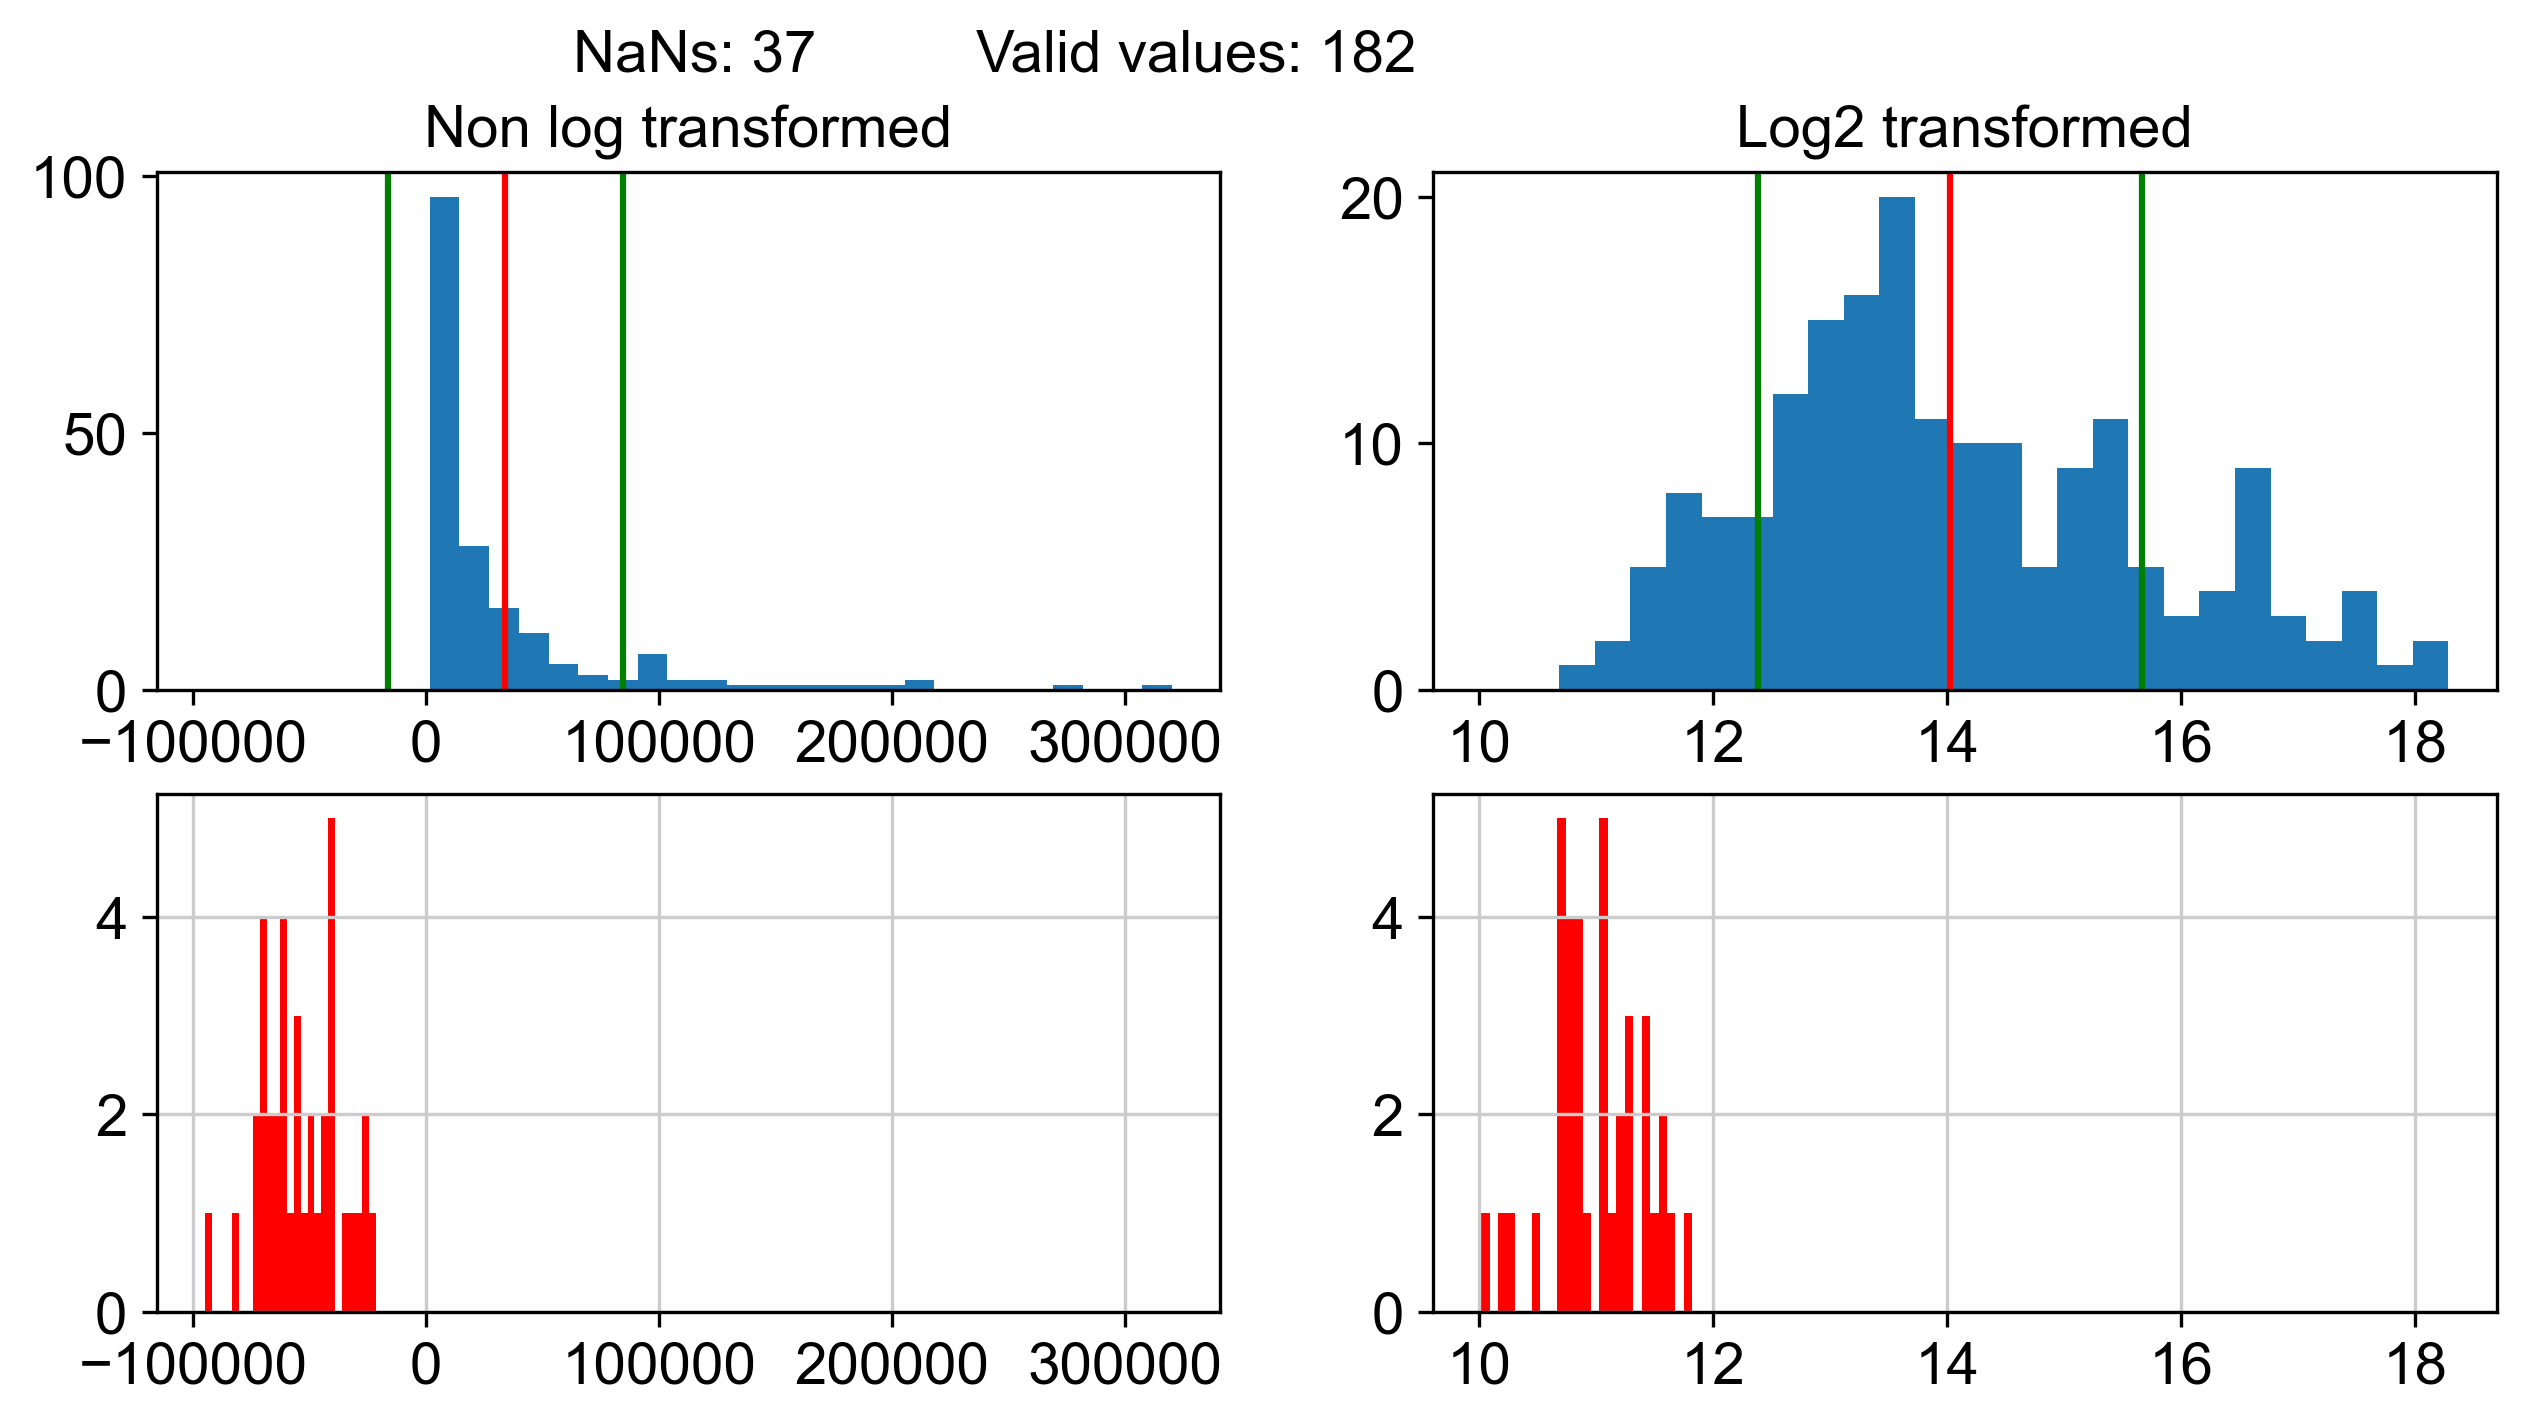

In [ ]:
mean,stddev,nans,num_nans = impute_single_debugging(df["A0A075B6K5"].values, mean_shift, std_dev_shift)

12:07:06.96 | DEBUG | mean: 13640.759631336405
12:07:06.97 | DEBUG | stddev: 8789.656260850932
12:07:06.97 | DEBUG | Coefficient of variation: 0.6443670659410188
12:07:06.97 | DEBUG | Min  : 2764.12
12:07:06.97 | DEBUG | Max  : 39269.0


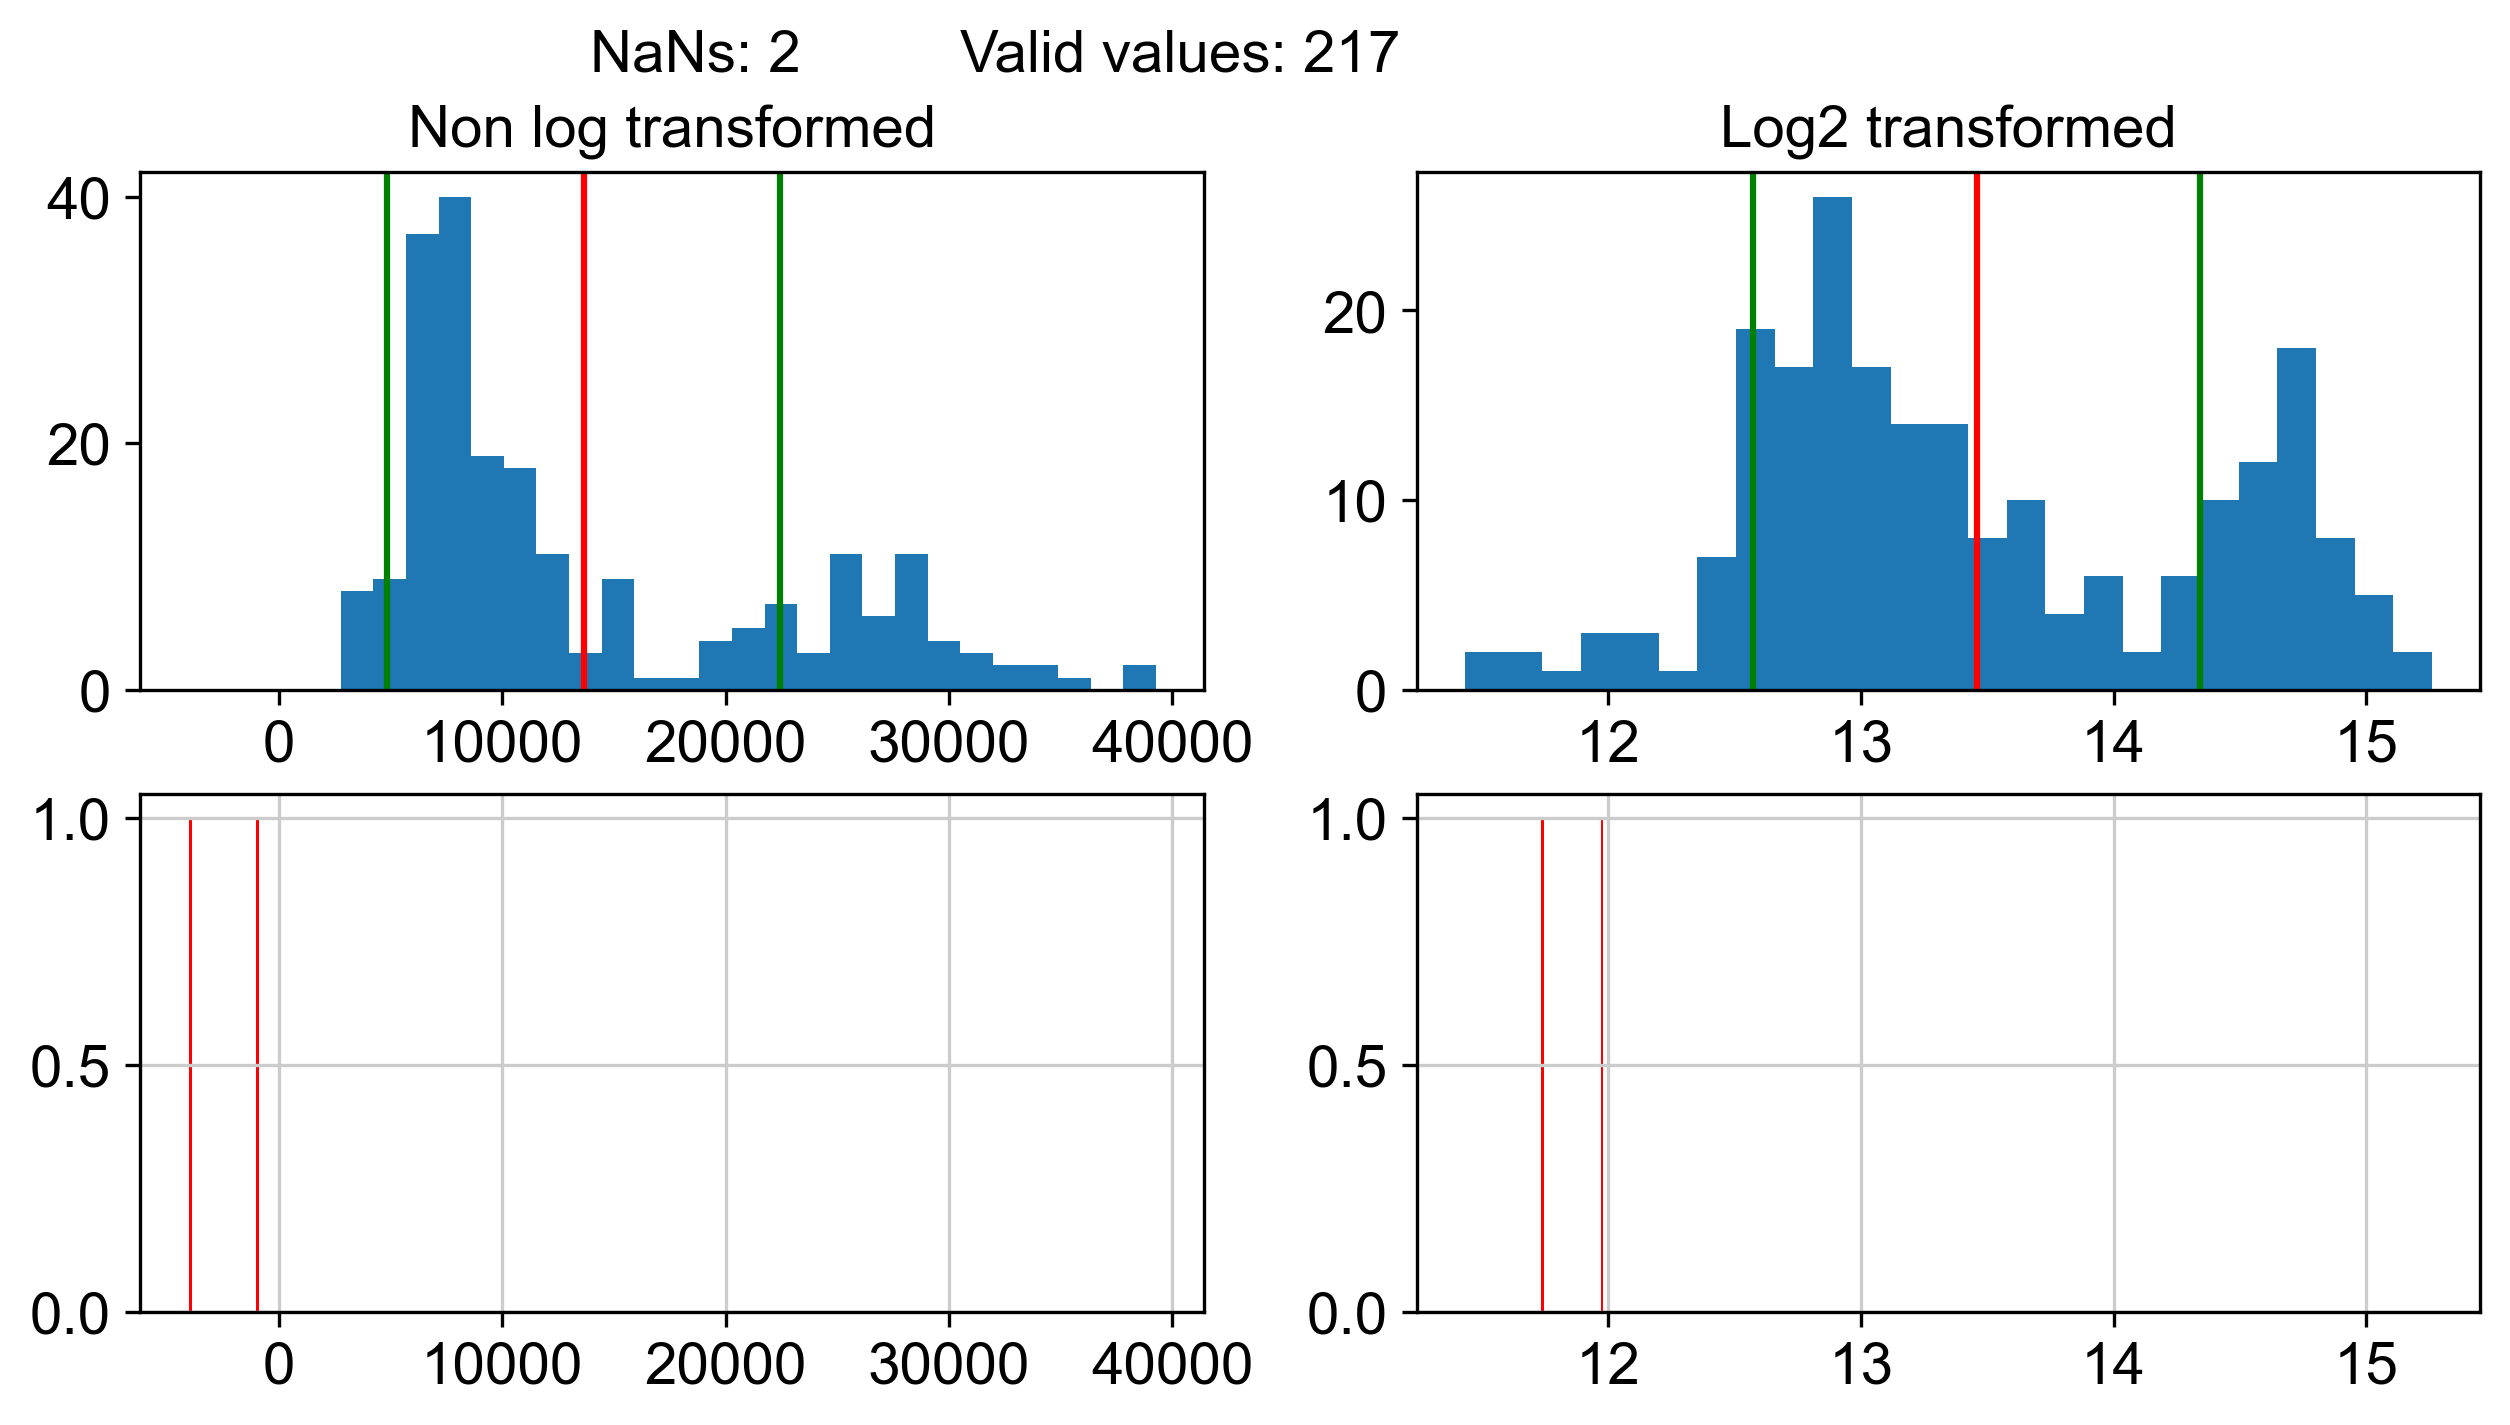

In [107]:
#lets look at a low NaN protein
mean,stddev,nans,num_nans = impute_single_debugging(df["A0MZ66"].values, mean_shift, std_dev_shift)

In [117]:
array = df["A0MZ66"].values
 #plot log2 transformed array
array_log2 = np.log2(array)
mean_log2 = np.nanmean(array_log2)
stddev_log2 = np.nanstd(array_log2)

13:16:10.24 | DEBUG | mean: 7929.124964028778
13:16:10.24 | DEBUG | stddev: 4458.507798407947
13:16:10.24 | DEBUG | Coefficient of variation: 0.5622950601276165
13:16:10.24 | DEBUG | Min  : 826.252
13:16:10.24 | DEBUG | Max  : 23532.2


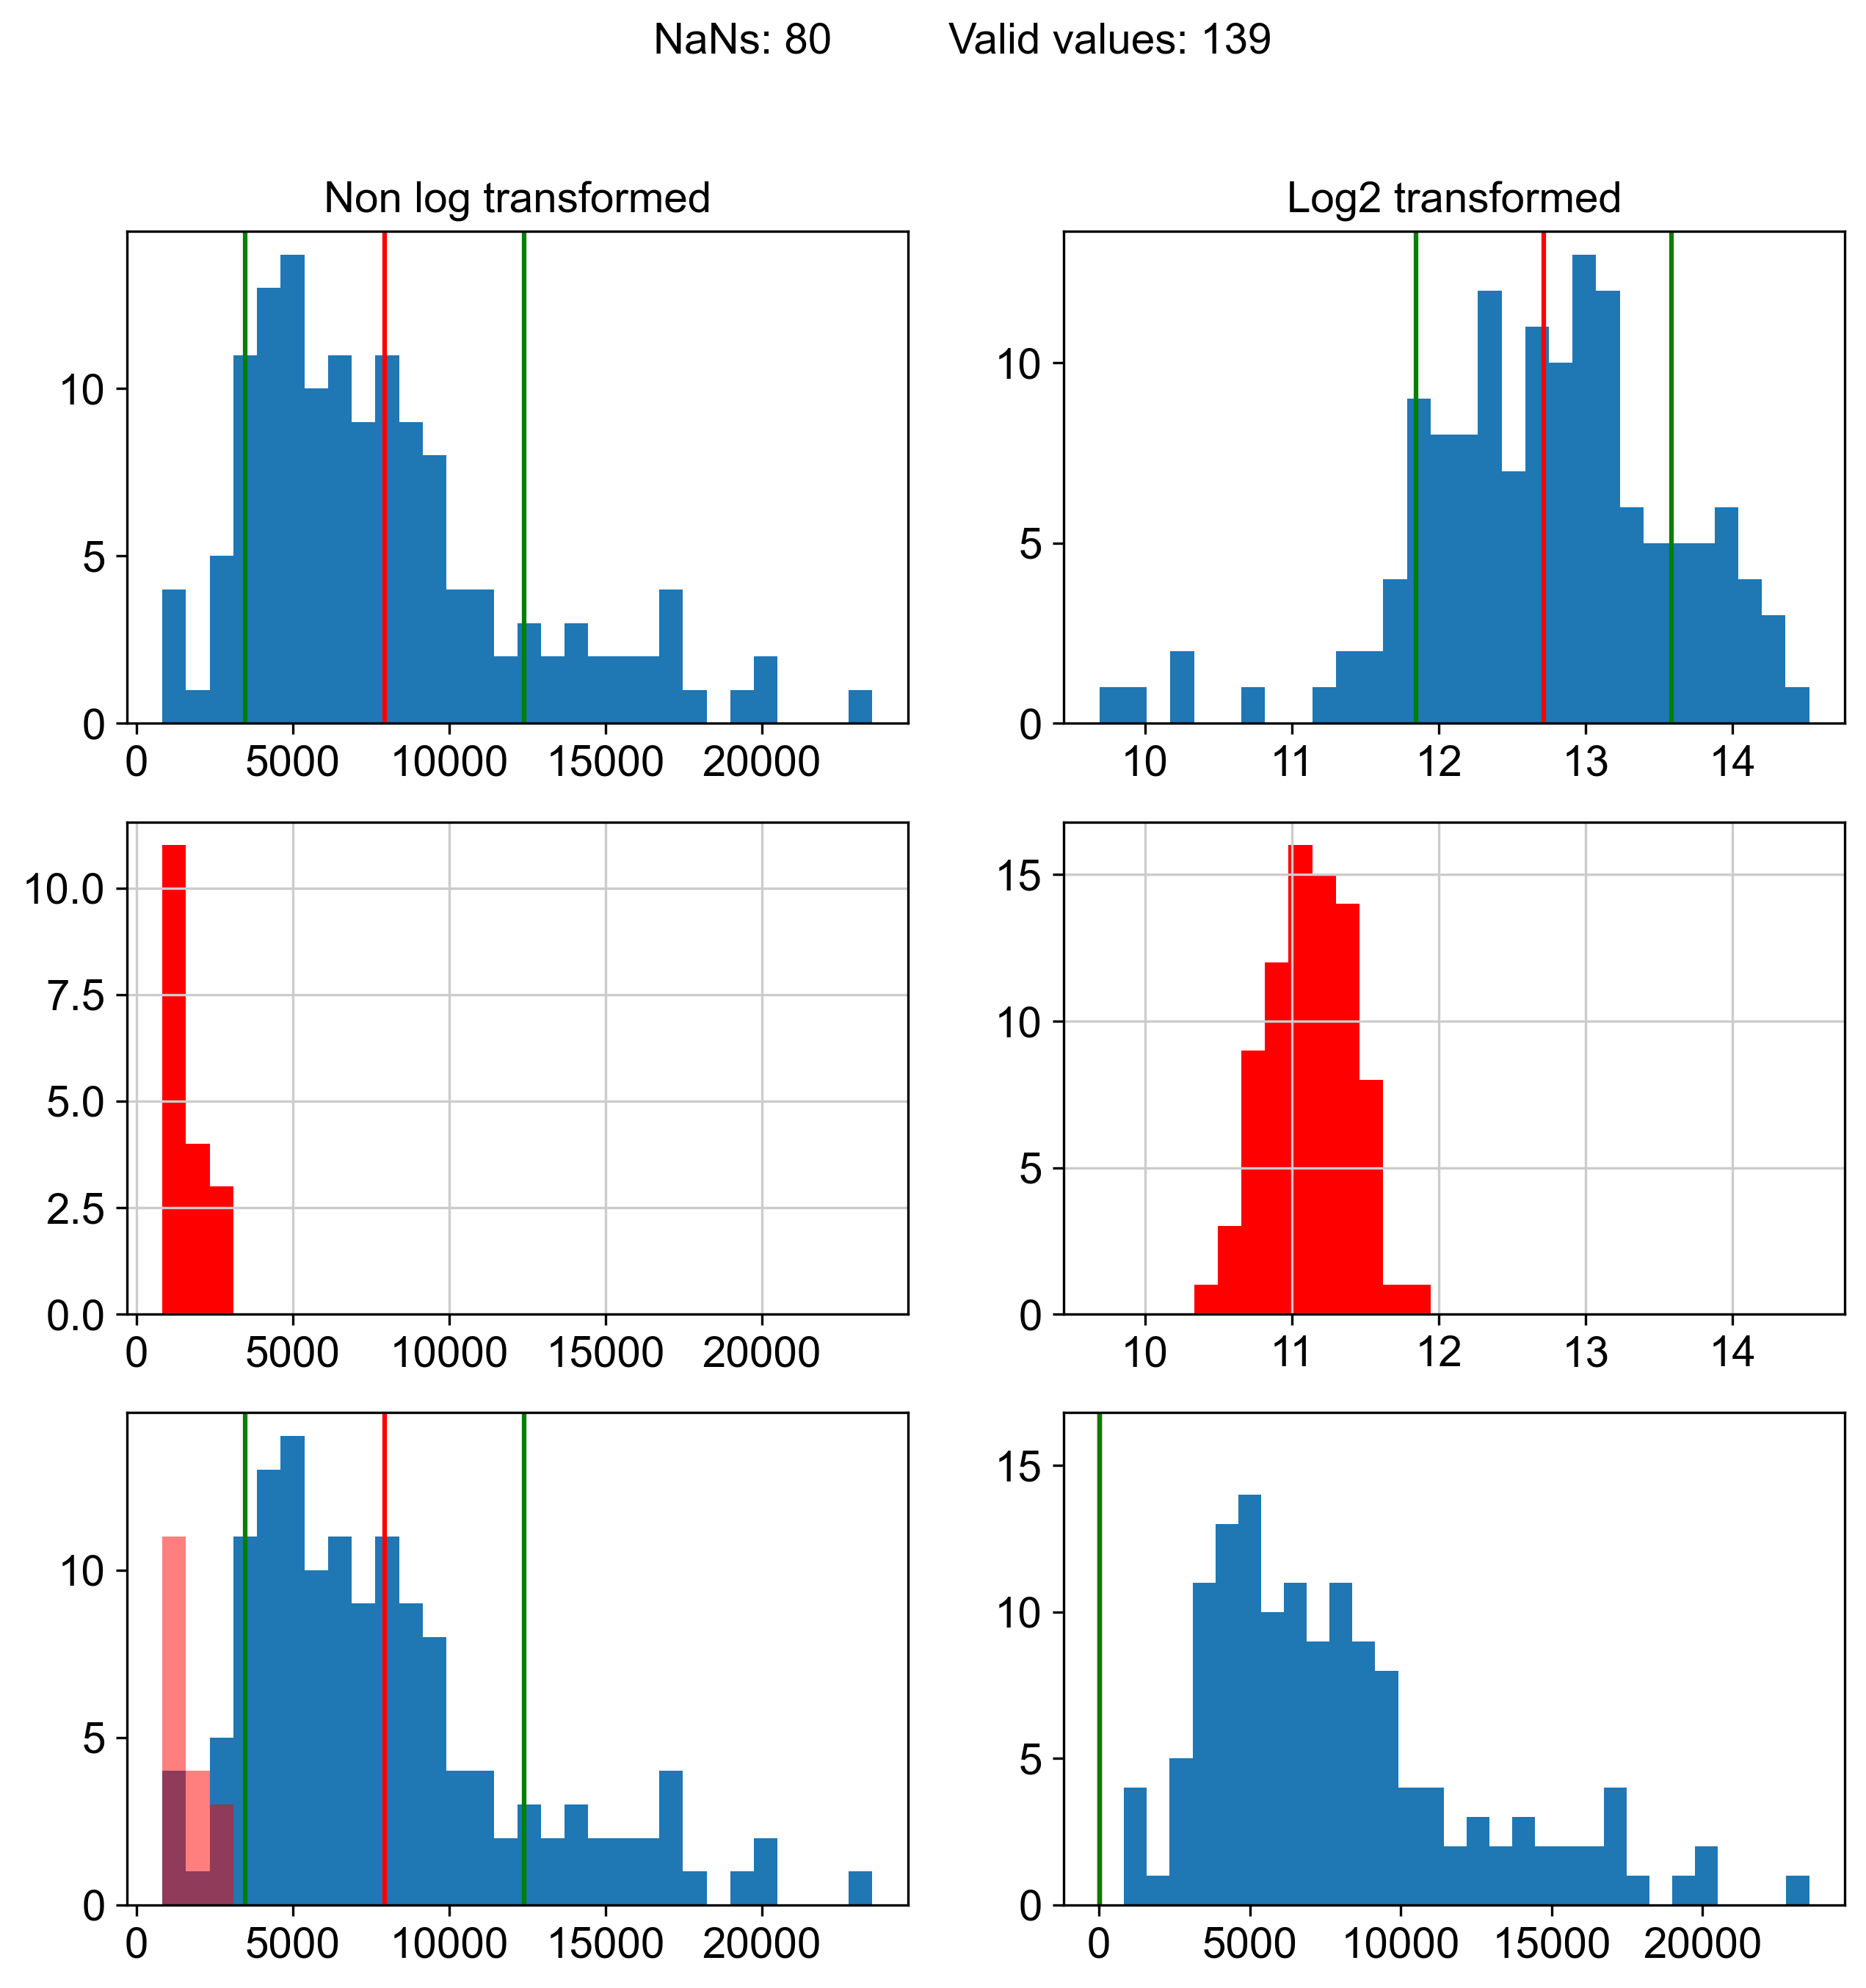

In [137]:
#lets look at a low NaN protein
mean,stddev,nans,num_nans = impute_single_debugging(df["O00142"].values, mean_shift, std_dev_shift)

In [138]:
mean   = np.nanmean(array)
stddev = np.nanstd(array)
nans   = np.isnan(array)
num_nans = np.sum(nans)

In [148]:
def impute_single_debugging(array, mean_shift, std_dev_shift):
    
    array_log2 = np.log2(array)
    mean_log2 = np.nanmean(array_log2)
    stddev_log2 = np.nanstd(array_log2)
    nans = np.isnan(array_log2)
    num_nans = np.sum(nans)

    shifted_random_values_log2 = np.random.normal(
        loc=(mean_log2 + (mean_shift * stddev_log2)), 
        scale=(stddev_log2 * std_dev_shift), 
        size=num_nans)
    
    #qc
    logger.debug(f"mean: {mean_log2}")
    logger.debug(f"stddev: {stddev_log2}")
    logger.debug(f"Coefficient of variation: {np.nanstd(array)/np.nanmean(array)}")
    logger.debug(f"Min  : {np.nanmin(array_log2)}")
    logger.debug(f"Max  : {np.nanmax(array_log2)}")

    fig,ax = plt.subplots()
    _,bins,_ = plt.hist(array_log2, bins=30)

    ax.hist(array_log2, bins=bins, color="b")
    ax.hist(shifted_random_values_log2, bins=bins, color='r', alpha=0.5)
    ax.axvline(mean_log2, color='r')
    ax.axvline(mean_log2 + stddev_log2, color='g')
    ax.axvline(mean_log2 - stddev_log2, color='g')
    ax.grid(False)

    plt.show()

13:25:52.51 | DEBUG | mean: 12.717451596614927
13:25:52.51 | DEBUG | stddev: 0.8690595569905444
13:25:52.51 | DEBUG | Coefficient of variation: 0.5622950601276165
13:25:52.51 | DEBUG | Min  : 9.690438048542212
13:25:52.51 | DEBUG | Max  : 14.522348582420276


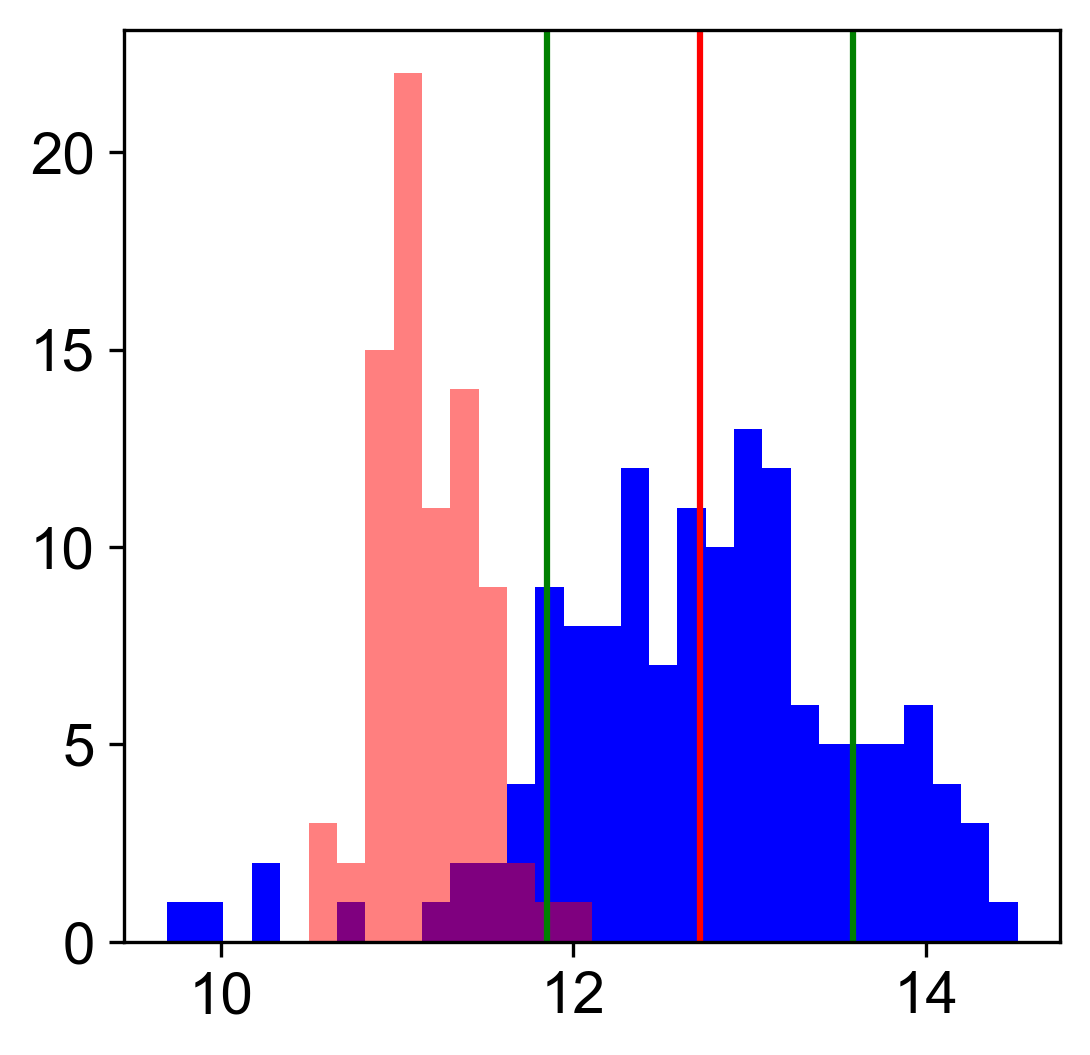

In [149]:
impute_single_debugging(df["O00142"].values, mean_shift, std_dev_shift)

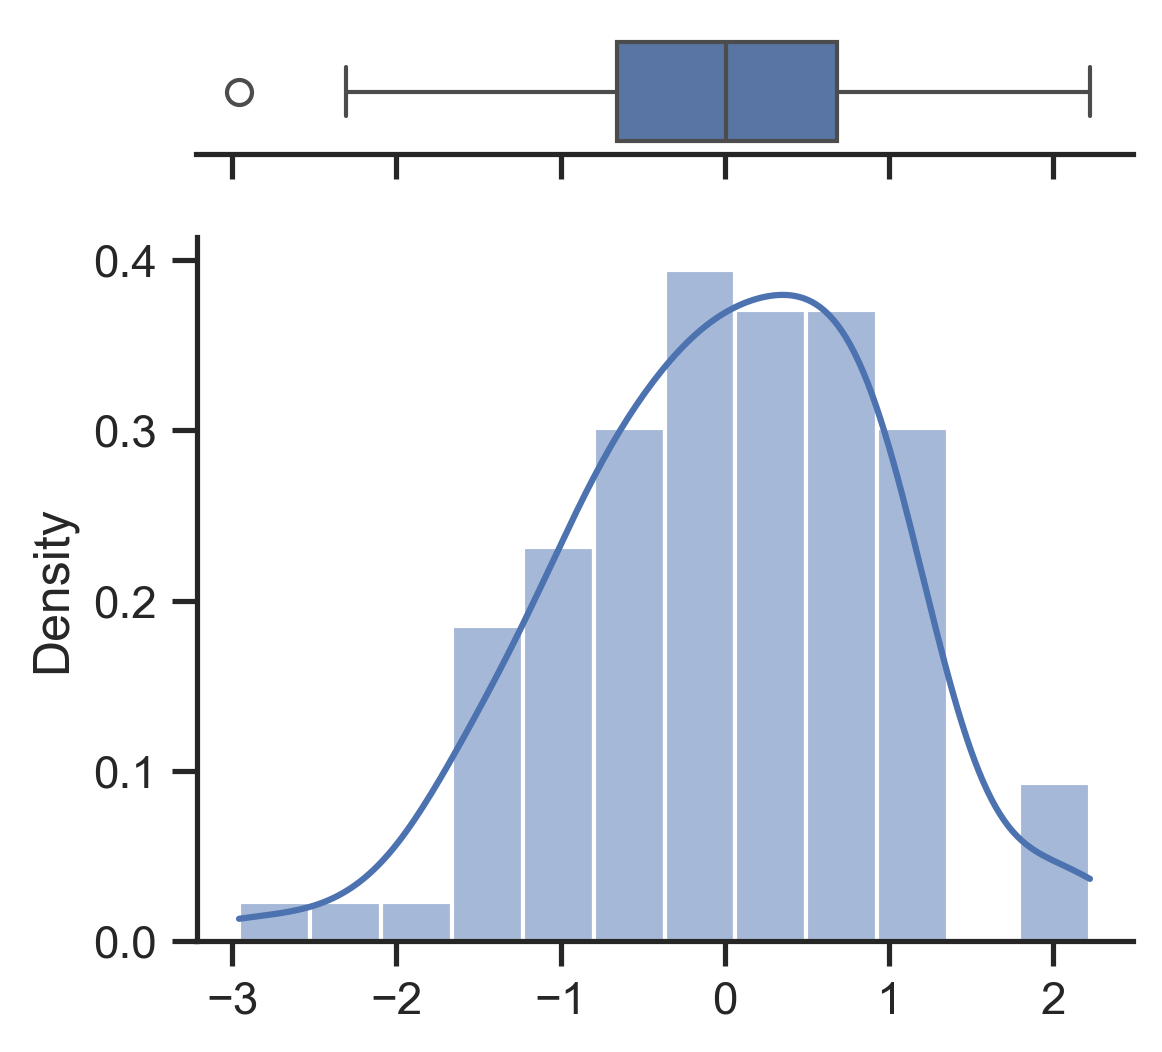

In [151]:
np.random.seed(2022)
x = np.random.randn(100)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [152]:
import seaborn as sns

In [231]:
def impute_single_debugging(array, mean_shift, std_dev_shift, report_stats=False):
    
    array_log2 = np.log2(array)
    mean_log2 = np.nanmean(array_log2)
    stddev_log2 = np.nanstd(array_log2)
    nans = np.isnan(array_log2)
    num_nans = np.sum(nans)

    shifted_random_values_log2 = np.random.normal(
        loc=(mean_log2 + (mean_shift * stddev_log2)), 
        scale=(stddev_log2 * std_dev_shift), 
        size=num_nans)
    
    if report_stats:
        logger.debug(f"mean: {mean_log2}")
        logger.debug(f"stddev: {stddev_log2}")
        logger.debug(f"Coefficient of variation: {np.nanstd(array)/np.nanmean(array)}")
        logger.debug(f"Min  : {np.nanmin(array_log2)}")
        logger.debug(f"Max  : {np.nanmax(array_log2)}")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    _,fixed_bins,_ = plt.hist(array_log2, bins=30)
    data = np.concatenate([array_log2, shifted_random_values_log2])
    groups = ['Raw'] * len(array_log2) + ['Imputed'] * len(shifted_random_values_log2)

    sns.boxplot(x=data, y=groups, ax=ax_box, palette=['b', 'r'], orient='h')
    sns.histplot(x=array_log2, bins=fixed_bins, kde=False, ax=ax_hist, color='b', alpha=0.8)
    sns.histplot(x=shifted_random_values_log2, bins=fixed_bins, kde=False, ax=ax_hist, color='r', alpha=0.5)

    ax_box.set(yticks=[])
    ax_box.set(xticks=[])
    ax_hist.set(yticks=[], ylabel="")

    plt.tight_layout()
    plt.show()

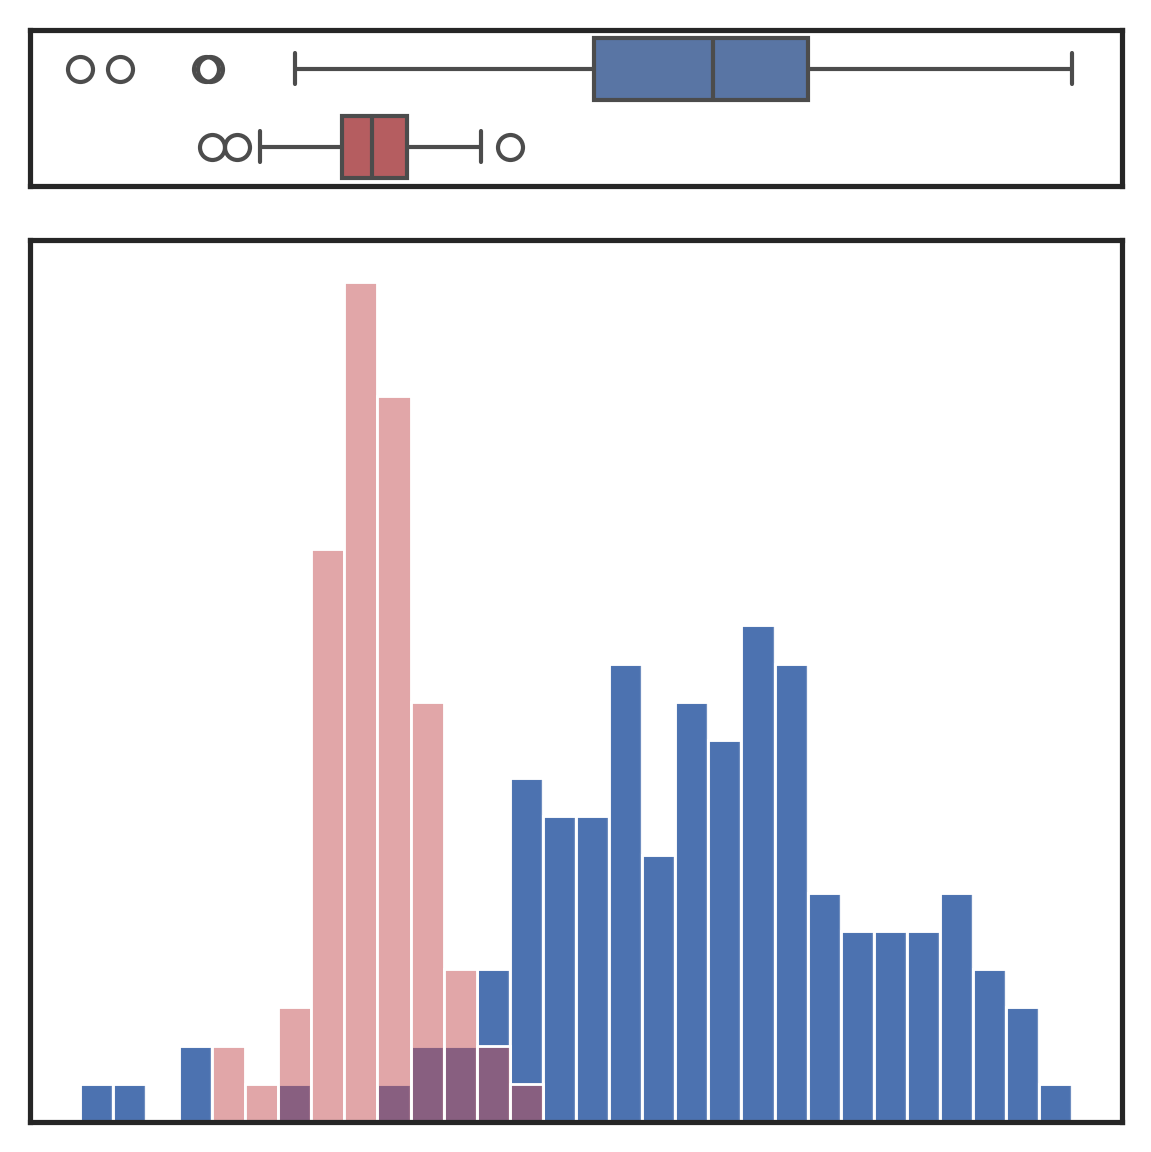

In [232]:
impute_single_debugging(df["O00142"].values, mean_shift, std_dev_shift)

13:43:20.53 | DEBUG | mean: 13.460316397144902
13:43:20.53 | DEBUG | stddev: 0.6892257646157222
13:43:20.53 | DEBUG | Coefficient of variation: 0.537616817797535
13:43:20.53 | DEBUG | Min  : 12.059185579848105
13:43:20.53 | DEBUG | Max  : 15.205029555005872


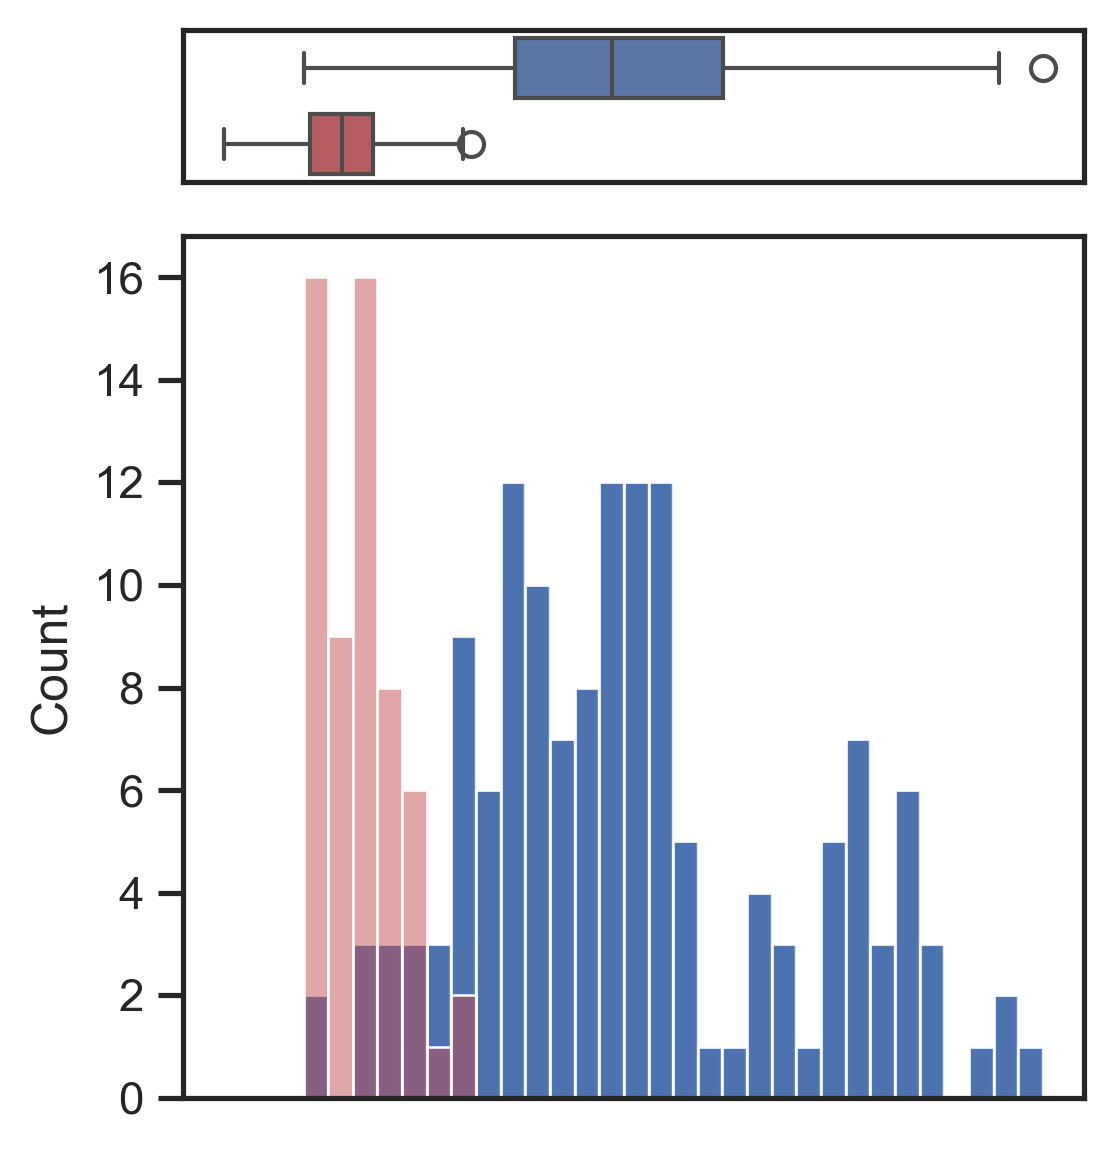

13:43:20.71 | DEBUG | mean: 14.02571314323039
13:43:20.71 | DEBUG | stddev: 1.64462482143163
13:43:20.71 | DEBUG | Coefficient of variation: 1.4851395084599062
13:43:20.71 | DEBUG | Min  : 10.68473985554056
13:43:20.71 | DEBUG | Max  : 18.287811561424174


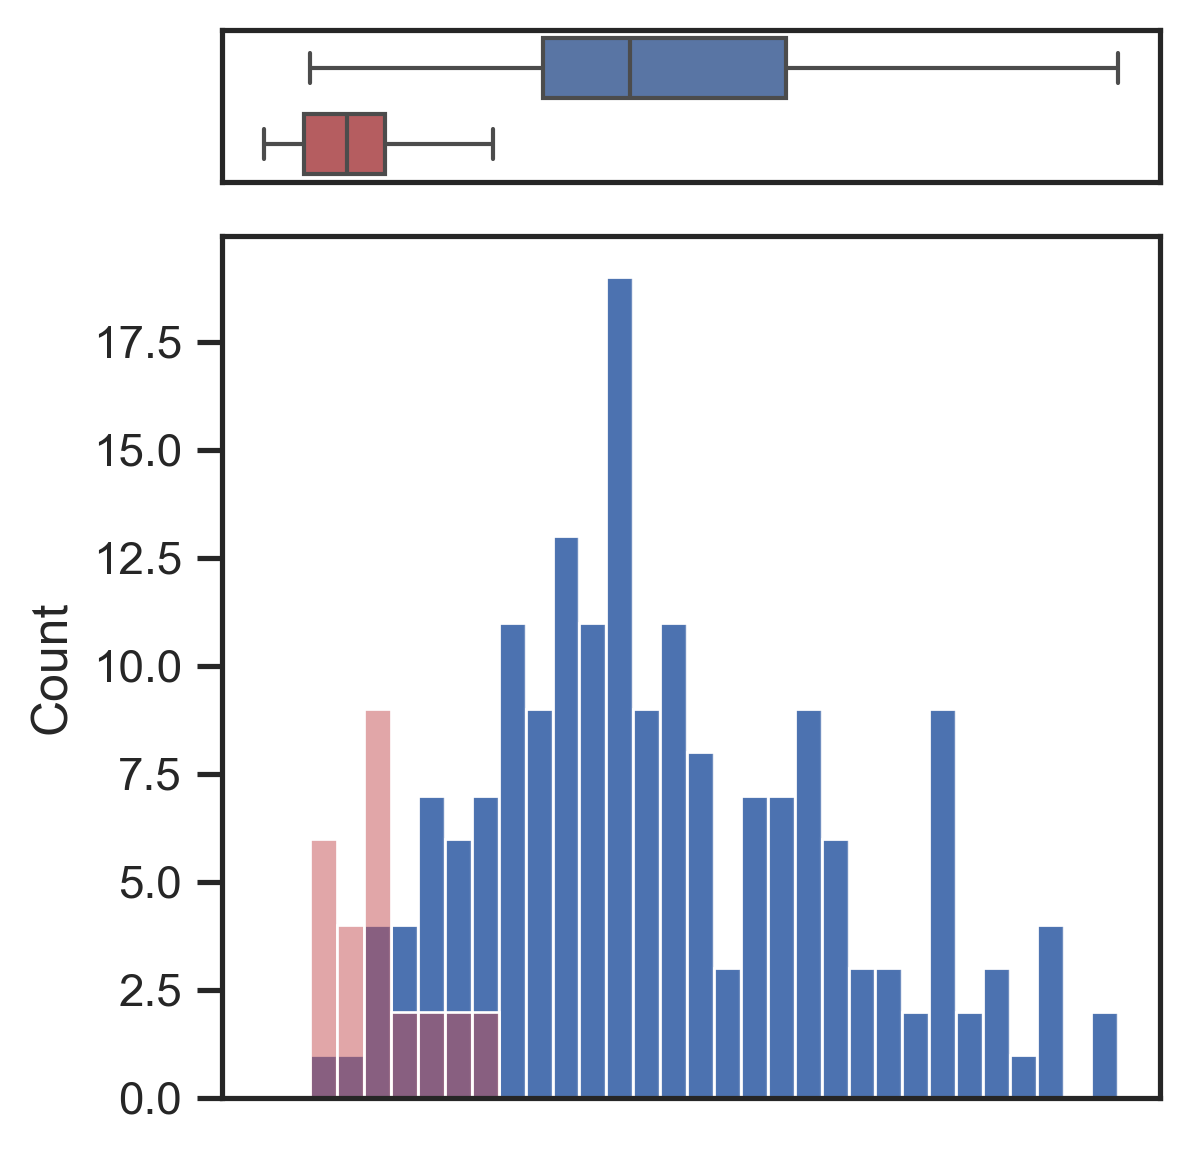

13:43:20.84 | DEBUG | mean: 15.137908716195675
13:43:20.84 | DEBUG | stddev: 1.471367089483843
13:43:20.84 | DEBUG | Coefficient of variation: 1.2588372420380753
13:43:20.84 | DEBUG | Min  : 12.152833038321788
13:43:20.84 | DEBUG | Max  : 18.903861256501305


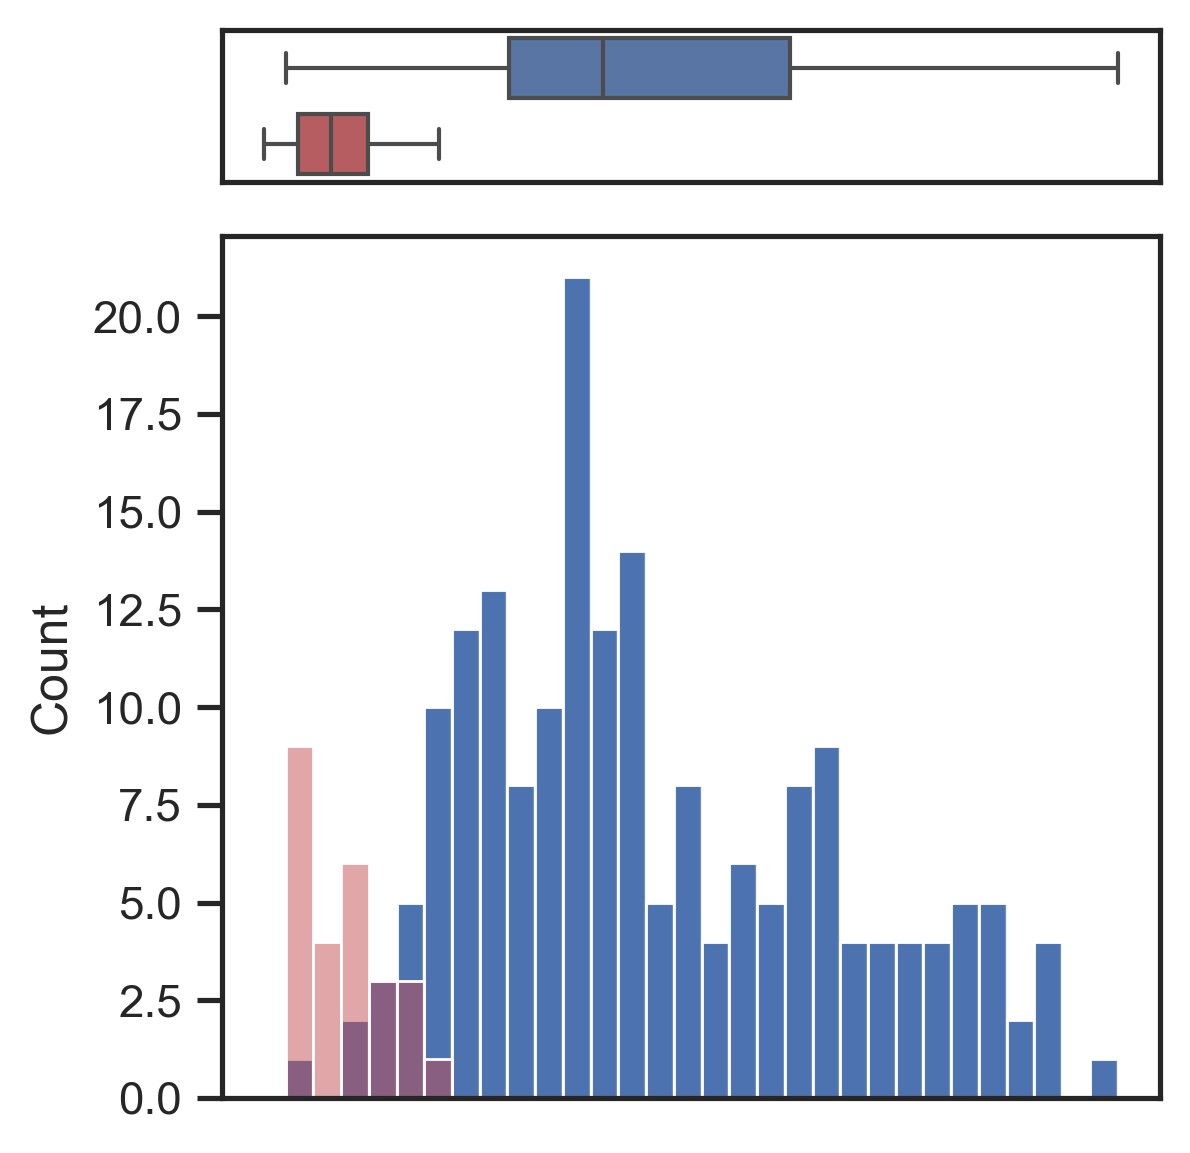

13:43:20.99 | DEBUG | mean: 12.84993311336745
13:43:20.99 | DEBUG | stddev: 1.5776553751614242
13:43:20.99 | DEBUG | Coefficient of variation: 1.5214775640177636
13:43:20.99 | DEBUG | Min  : 10.231485210550286
13:43:20.99 | DEBUG | Max  : 16.93948739017051


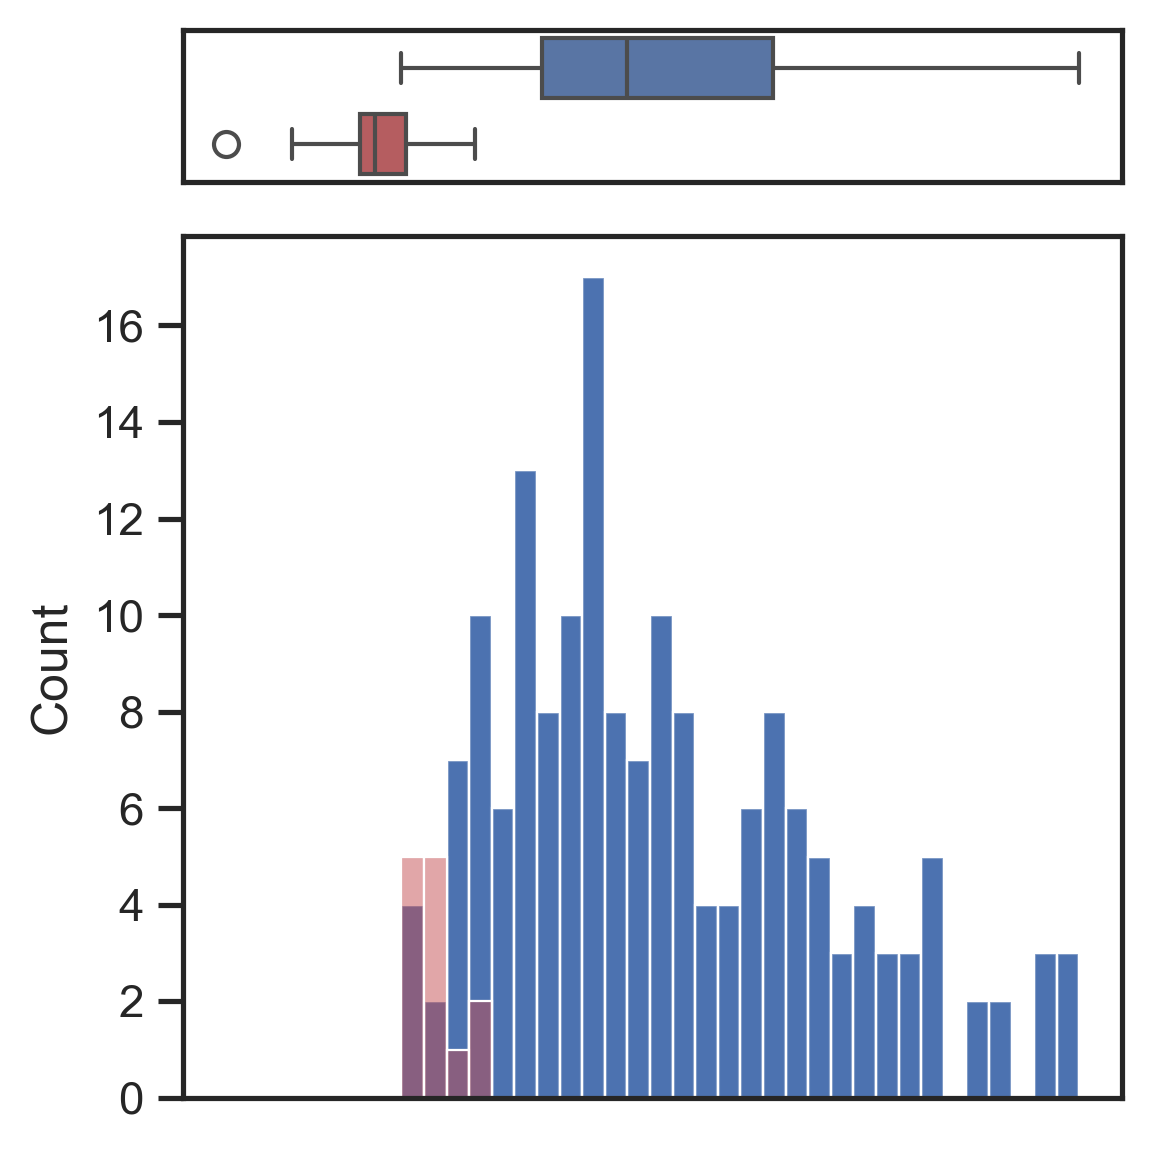

13:43:21.12 | DEBUG | mean: 14.023351040435685
13:43:21.12 | DEBUG | stddev: 1.3105321621185393
13:43:21.12 | DEBUG | Coefficient of variation: 1.0540816885514104
13:43:21.12 | DEBUG | Min  : 11.751092100065092
13:43:21.12 | DEBUG | Max  : 17.015687274407778


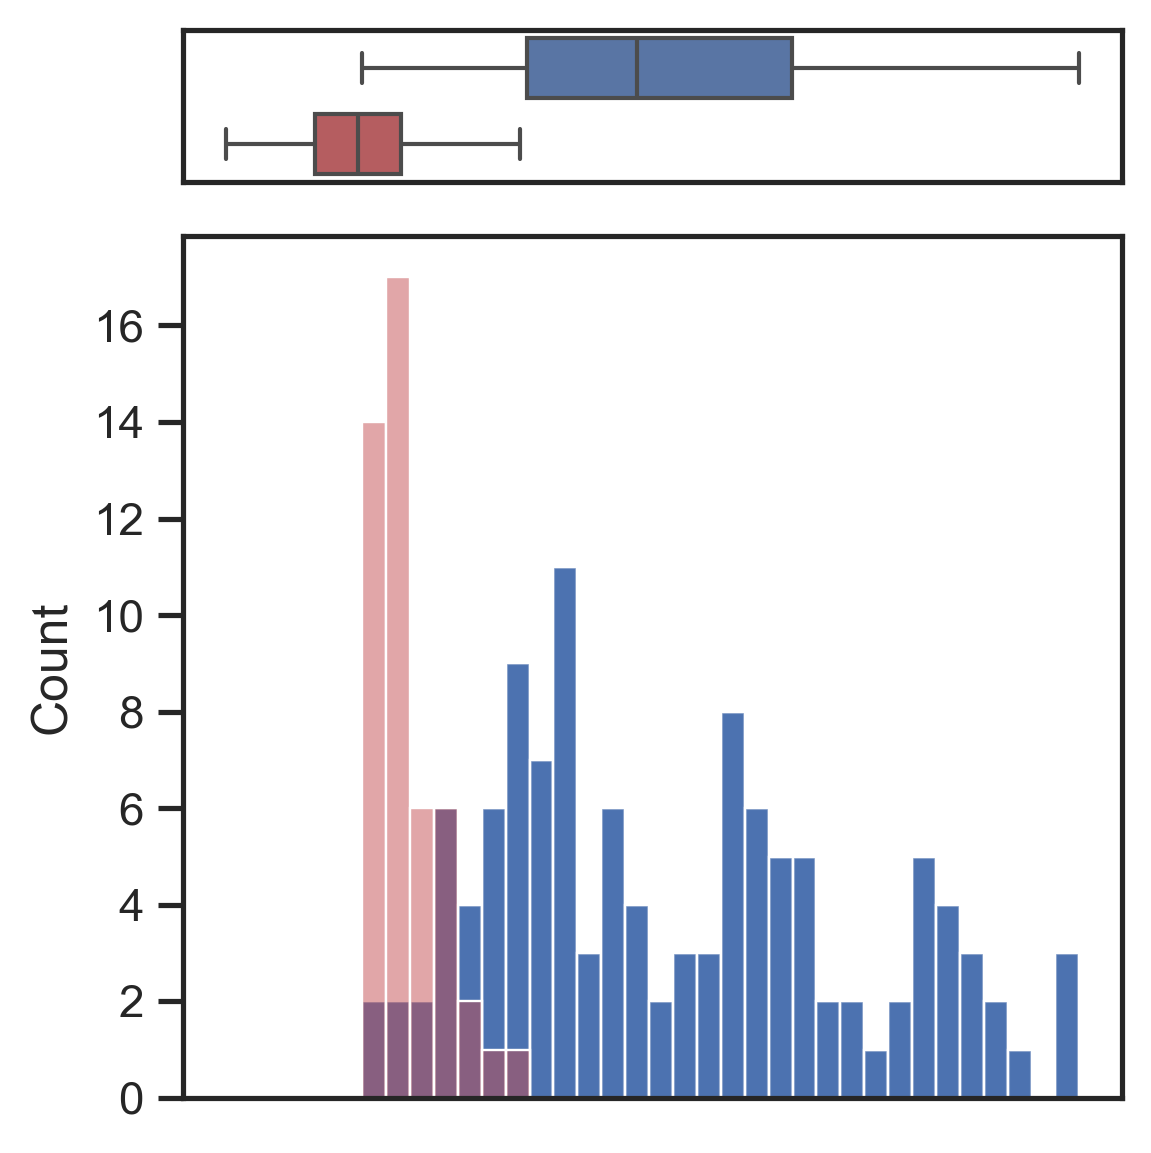

13:43:21.27 | DEBUG | mean: 16.252547197918197
13:43:21.27 | DEBUG | stddev: 1.617625104444634
13:43:21.27 | DEBUG | Coefficient of variation: 1.3758122962084314
13:43:21.27 | DEBUG | Min  : 13.161580686625628
13:43:21.27 | DEBUG | Max  : 20.043013929202164


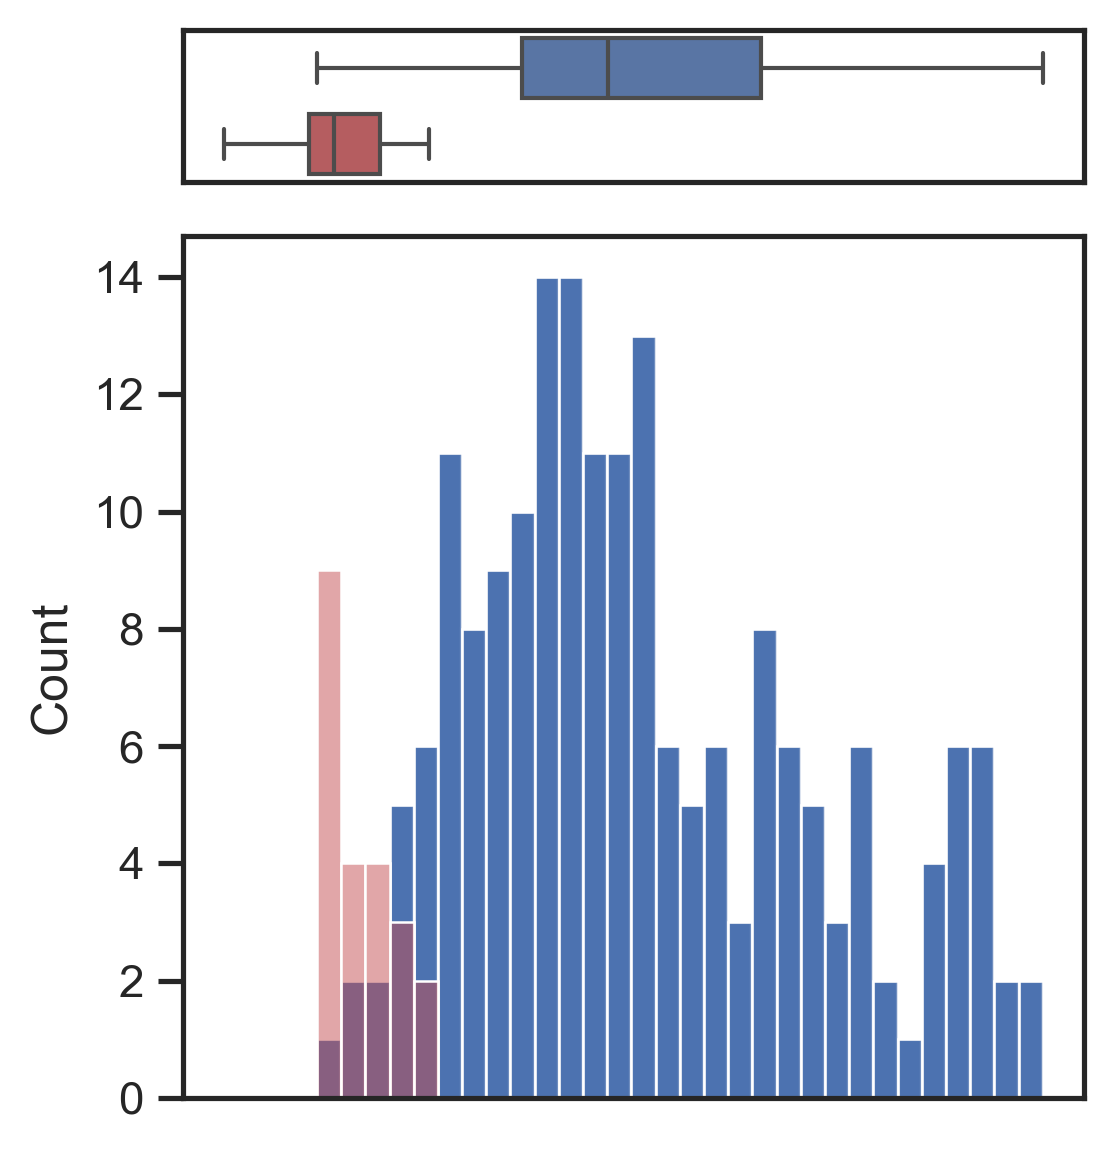

13:43:21.39 | DEBUG | mean: 14.077014969785036
13:43:21.39 | DEBUG | stddev: 1.5573149491509346
13:43:21.39 | DEBUG | Coefficient of variation: 1.3727142104844998
13:43:21.39 | DEBUG | Min  : 10.841163324985947
13:43:21.39 | DEBUG | Max  : 17.898347485877448


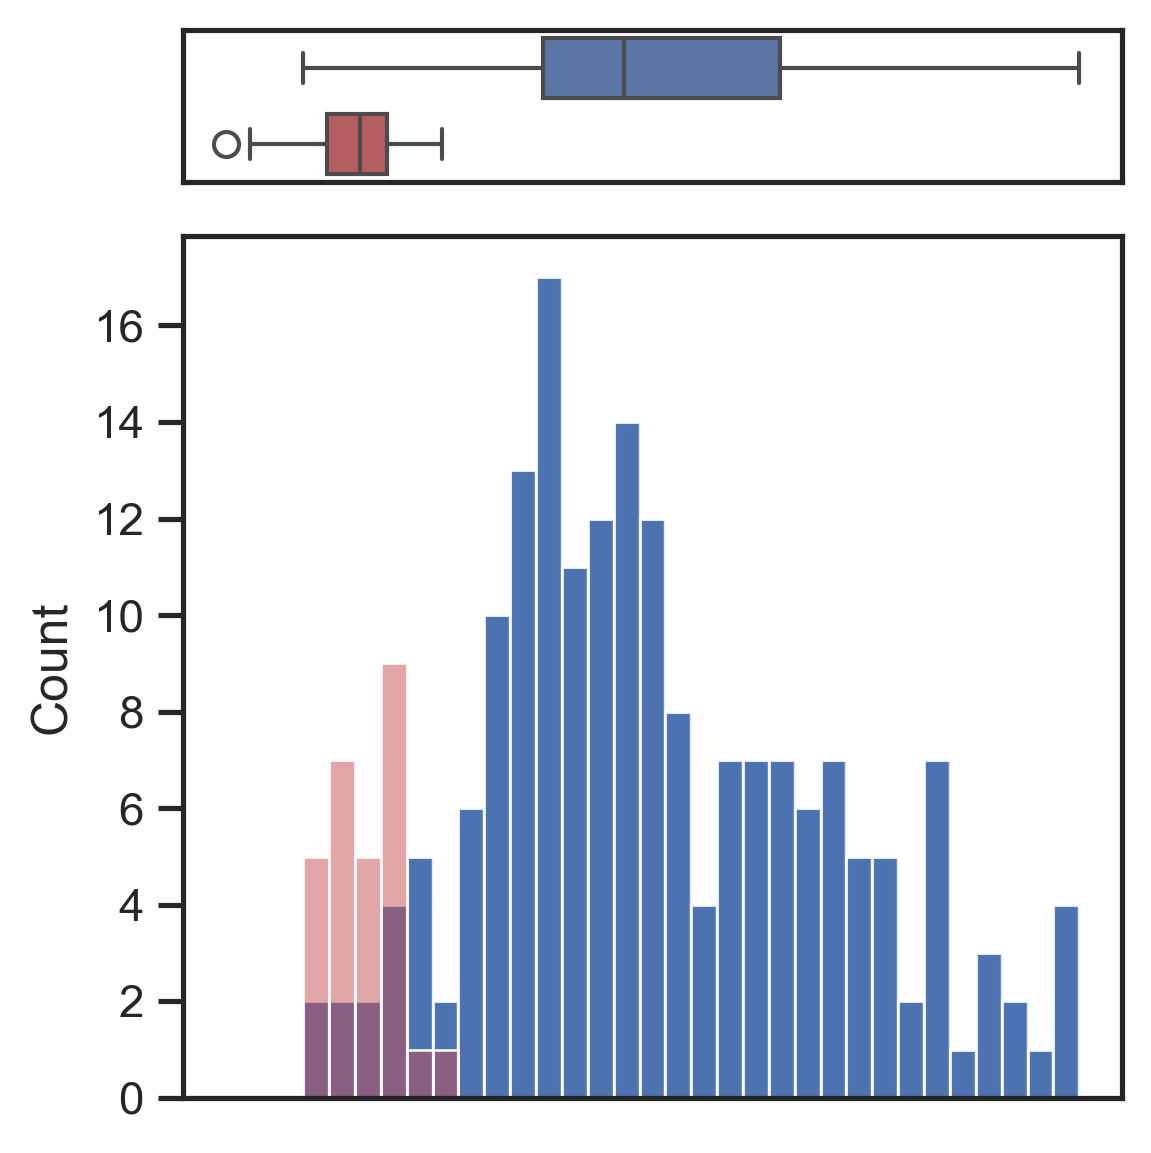

13:43:21.54 | DEBUG | mean: 15.182668551307012
13:43:21.54 | DEBUG | stddev: 0.7551096294614618
13:43:21.54 | DEBUG | Coefficient of variation: 1.0222048718012036
13:43:21.54 | DEBUG | Min  : 13.232071603981645
13:43:21.54 | DEBUG | Max  : 19.03581933590056


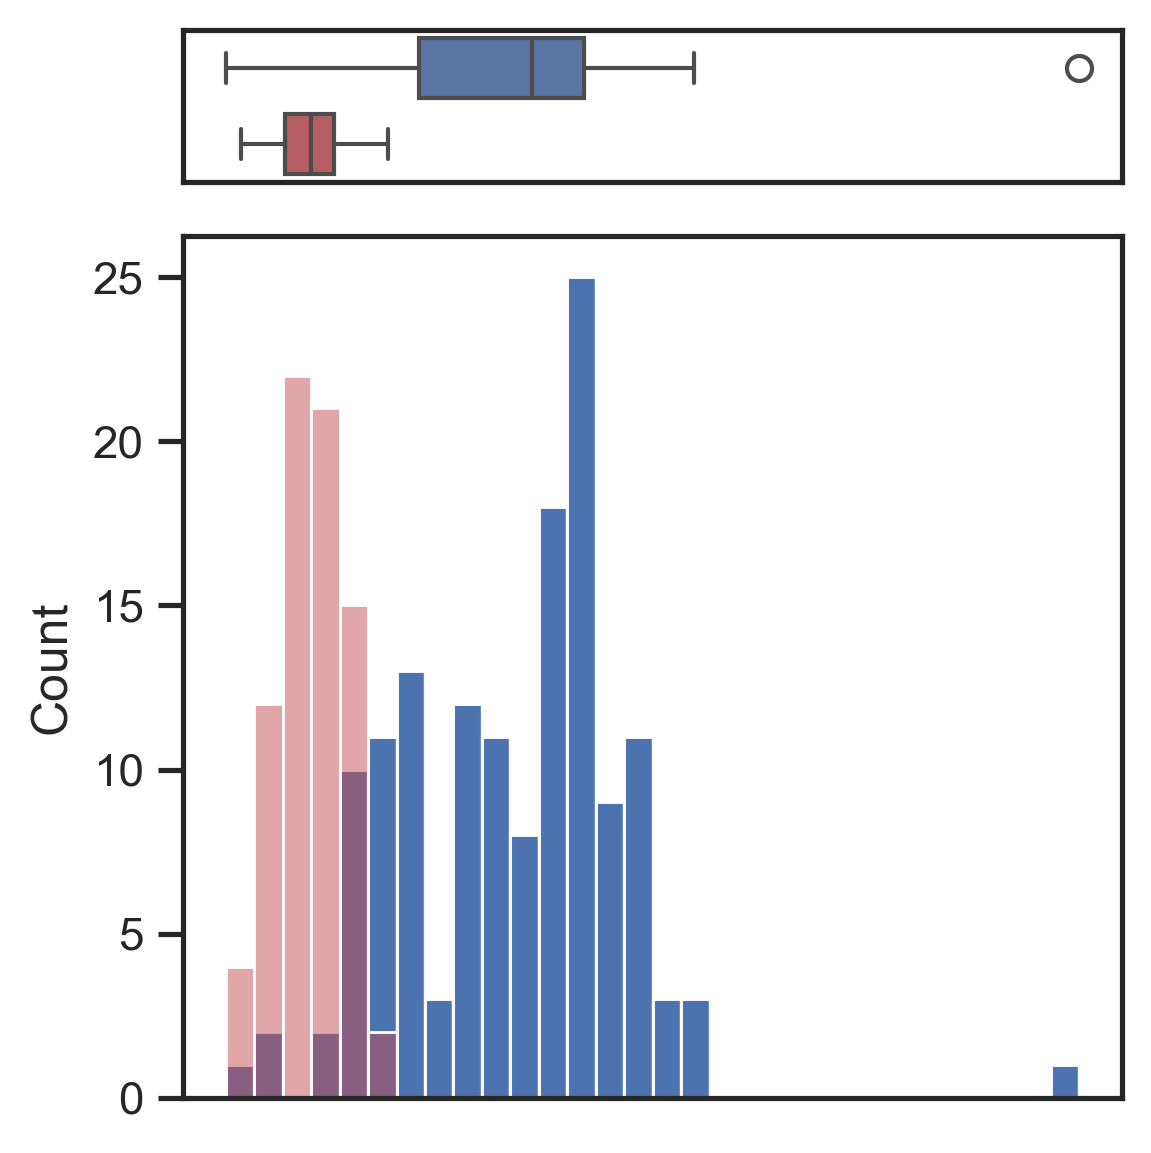

13:43:21.66 | DEBUG | mean: 14.094112559384115
13:43:21.66 | DEBUG | stddev: 1.381965184599734
13:43:21.66 | DEBUG | Coefficient of variation: 1.1938206461692755
13:43:21.66 | DEBUG | Min  : 11.3786633410164
13:43:21.66 | DEBUG | Max  : 17.360444184135027


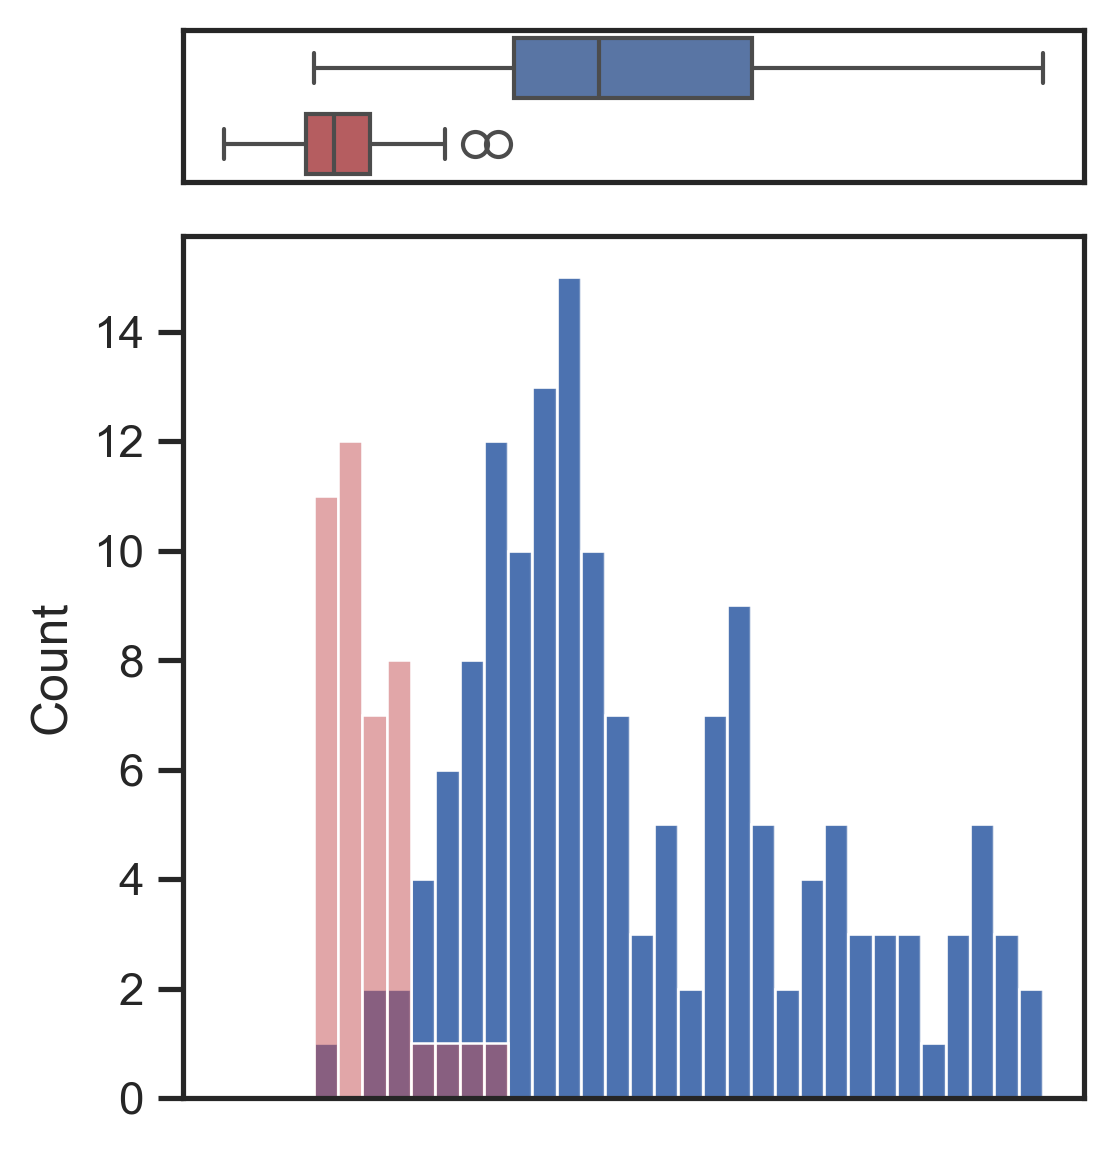

13:43:21.81 | DEBUG | mean: 13.33808084725101
13:43:21.81 | DEBUG | stddev: 1.259923963439582
13:43:21.81 | DEBUG | Coefficient of variation: 1.5566952433861274
13:43:21.81 | DEBUG | Min  : 11.310788847869357
13:43:21.81 | DEBUG | Max  : 18.01600298761491


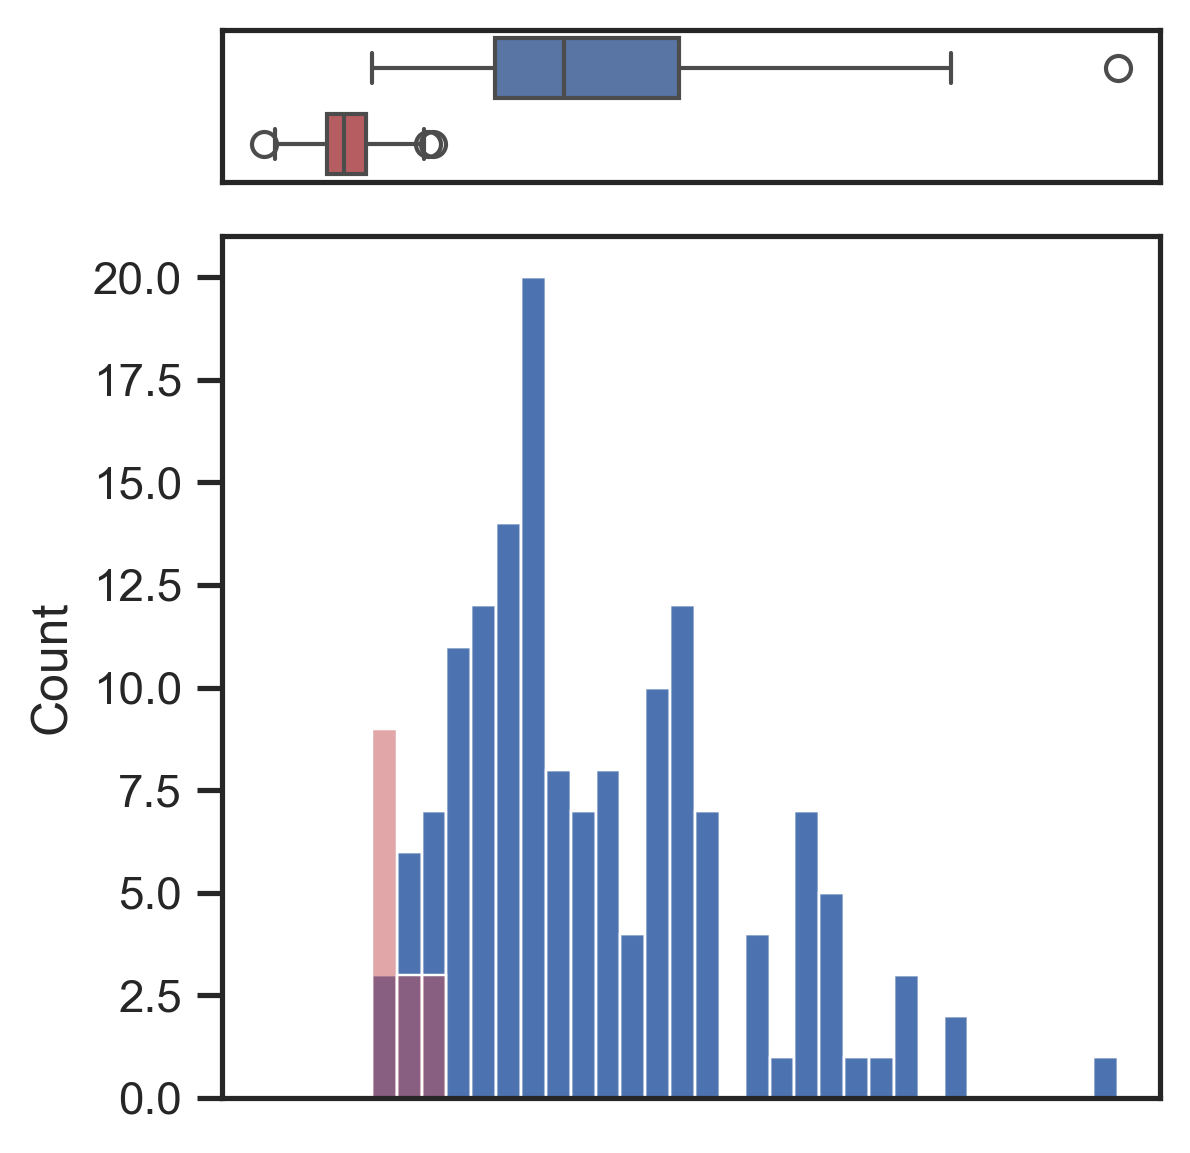

In [179]:
for protein in df.columns[:10]:
    impute_single_debugging(df[protein].values, mean_shift, std_dev_shift)

<Axes: >

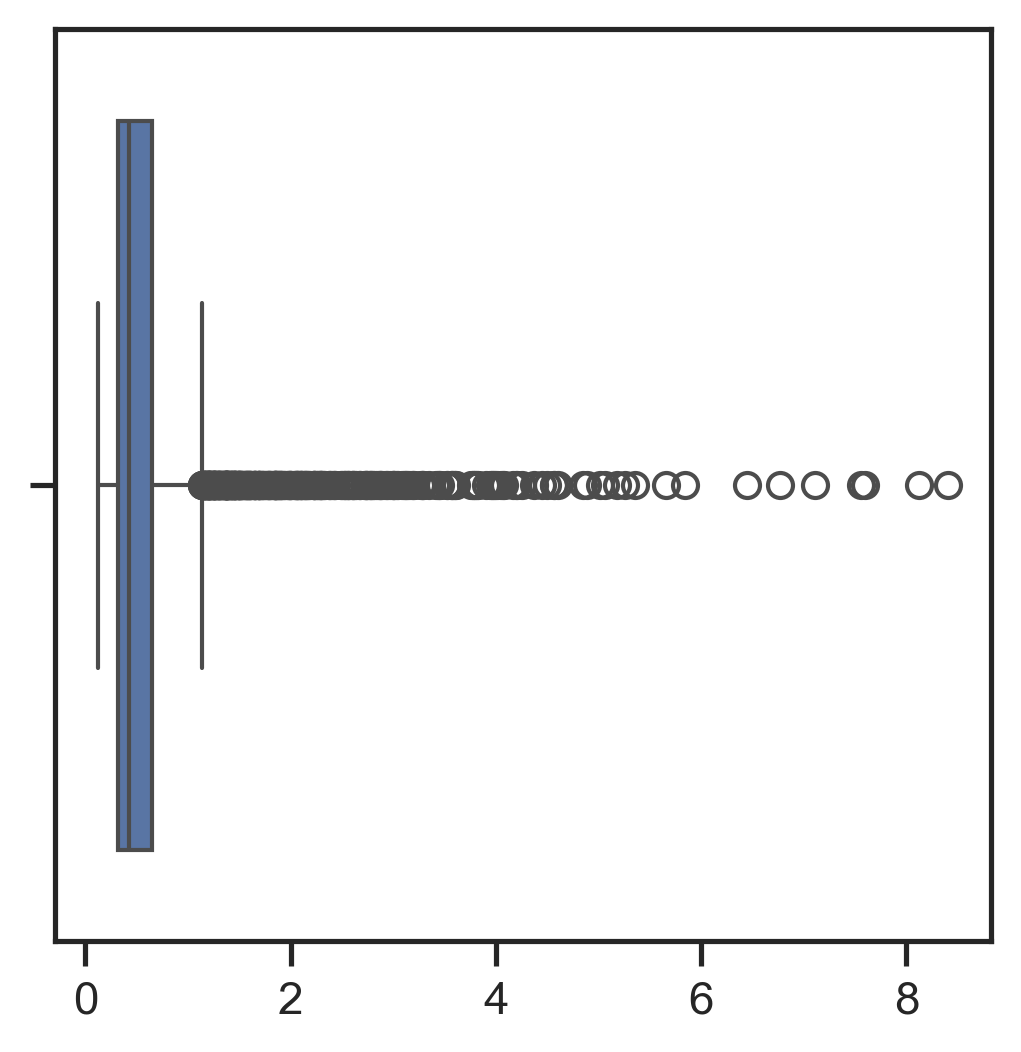

In [194]:
df = adata.to_df()
cvs = []
for protein in df.columns:
    array = df[protein].values
    mean   = np.nanmean(array)
    stddev = np.nanstd(array)
    cvs.append(stddev/mean)

sns.boxplot(x=cvs)

In [183]:
df

Protein.Group,A0A024R1R8;Q9Y2S6,A0A075B6K5,A0A075B6S2,A0A075B6S5;A0A0C4DH67;A0A0C4DH69,A0A075B7B8,A0A0A0MRZ8;P04433,A0A0A0MS15,A0A0B4J2D5;P0DPI2,A0A0C4DH25,A0A0C4DH38,...,Q9Y6N5,Q9Y6Q5,Q9Y6R4,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X3,Q9Y6X5,Q9Y6X9,Q9Y6Y8
LCMS_run_id,,,,,,,,,,,,,,,,,,,,,
8550,13364.2,83429.30,126706.0,125688.00,NaN,391668.0,76564.00,NaN,53811.70,18921.60,...,71061.2,NaN,NaN,NaN,5441.48,39037.8,3575.00,4217.99,NaN,19015.9
8549,16060.4,106445.00,302754.0,98833.90,82698.10,670393.0,207774.00,NaN,106622.00,42090.70,...,64535.0,NaN,NaN,NaN,NaN,29610.7,3709.38,4550.10,NaN,17180.6
8559,NaN,35072.00,115321.0,23076.00,26153.30,341067.0,63438.00,NaN,59568.60,26413.70,...,43265.0,NaN,NaN,NaN,NaN,29842.7,NaN,4276.24,NaN,NaN
8617,26018.9,28348.20,94934.1,13716.30,NaN,711857.0,41385.10,NaN,39141.10,11669.00,...,72353.9,NaN,4287.52,6972.38,7723.39,58269.8,6740.15,5478.59,NaN,18701.4
8555,NaN,85028.40,155076.0,32218.10,NaN,338271.0,104385.00,26210.9,66069.00,41365.50,...,64604.3,NaN,NaN,NaN,6987.34,39377.1,7190.47,4031.86,NaN,16759.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,11870.0,2542.66,13332.8,NaN,NaN,12379.0,2167.00,NaN,6245.30,NaN,...,39300.1,45472.9,5091.12,7261.85,4364.79,19849.3,8015.41,2188.77,6298.28,18379.8
8454,13030.0,8962.51,25034.7,3834.92,NaN,49750.3,10615.40,23328.4,11903.10,5423.10,...,48616.6,49984.4,4360.92,4331.81,3875.18,39174.8,10988.50,2922.80,7825.82,15458.4
8453,11401.9,5306.34,14062.8,2108.11,4178.89,28589.9,6880.29,NaN,5574.31,NaN,...,46475.0,38695.1,4380.50,7332.52,3493.32,32603.9,8900.74,3014.64,6507.96,16896.7


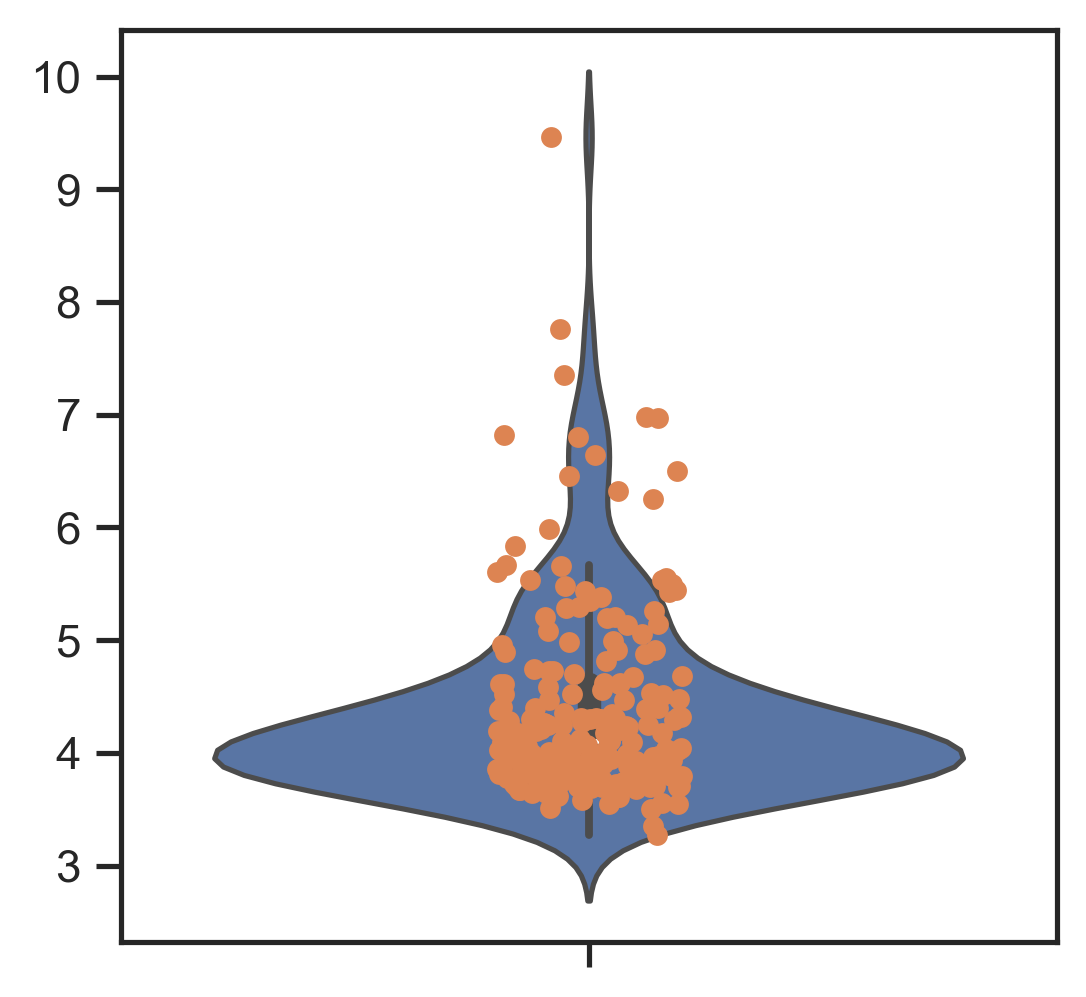

In [206]:
df = adata.to_df()
df = df.T
cvs = []

for sample in df.columns:
    array = df[sample].values
    mean   = np.nanmean(array)
    stddev = np.nanstd(array)
    cvs.append(stddev/mean)

sns.violinplot(y=cvs)
sns.stripplot(y=cvs)
plt.show()